<font color=BROWN>

#                       BUAN 6340.003.07.The Science of Investing in Stocks.xxx
</font>



<font color=black>

## BUAN 6340 - Project Report
### Programming for Data Science
### University of Texas at Dallas
### Group 07
</font>

<font color=green>
    
### Aditi Rane                              (AAR170008)
### Nikitha Kodathala                 (NXK170012)
### Prasanna Gopala Doddaballapura   (PXD180000)
### Roshiny Thomas                  (RXT180012)
### Rohanjit Singh Virdi                        (RXV180007)
</font>


#### EXECUTIVE SUMMARY:

Stock market is considered the primary indicator of a country’s economic strength and development. Stock Market prices are volatile in nature and are affected by factors like inflation, economic growth, etc. Prices of a share market depend heavily on demand and supply. High demanded stocks will increase in price whereas heavily sold stocks will decrease in price. Fluctuating stock prices affects the investor’s belief and thus there is a need to predict the future stock value. The objective of this project is mainly two-fold:

1. Preprocess the dataset according to the our objective. Our objective is explained in the following paragraphs. 

2. To forecast the stock market prices to make more informed and accurate investment decisions. We will make the use  of Long Short Term Memory of the Recurrent Neural Network Deep Learning algorithm, and ARIMA for this purpose.

This is a study about the last four years' function in stock market, which enables the investor to make decisions regarding investment. While there are various factors which directly or indirectly affect the market, we will target our research on sector-wise trends and profits. The project discusses recent machine learning & forecasting techniques to effectively explore the factors and predict future stock prices.


#### PROJECT MOTIVATION/ BACKGROUND:

Stock market is an important part of the economy of a country. The stock market plays a play a pivotal role in the growth of the industry and commerce of the country that eventually affects the economy of the country. That is reason that the government, industry and even the central banks of the country keep a close watch on the happenings of the stock market. The stock market is important from both the industry’s point of view as well as the investor’s point of view.
Our project is aimed at forecasting stock values and/or analyzing the financial metrics for the companies which have the highest gross profit in the 4 sectors, namely: Health Care, Information Technology, Telecommunications Services, and Industrials, to generate insights and make relevant predictions. We have sourced the data for this project from Kaggle, and the dataset gives information about stocks and various financial metrics. The information has been derived from all the Form 10-K’s (an annual report) submitted by these companies to the US Securities & Exchange Commission (SEC).

# Data Description


The dataset consists of 3 files, the contents of which have been elaborated below:

Securities.csv- This dataset provides a general description of each company, such as company name, address, the sector and sub-industry it belongs to, date when the Form 10-K was first filed and CIK number ( a Central Identification number, unique to each company).

Fundamentals.csv -This dataset contains metrics extracted from the annual SEC 10K filings (2012-2016). This file has most of the important financial metrics we wish to consider. It lists the accounts payable/receivable amounts for a company for each period the form was submitted, cash equivalents held by the company, common stocks, Deferred Asset/Liability  charges, depreciation amounts, earnings before and after tax, fixed assets, gross profit, long term debt amounts, total revenue, liabilities etc.

Prices.csv -This File has raw, daily, stock prices like the opening and closing price, and the highest and lowest stock value in that interval. Most of data spans from 2010 to the end 2016, for companies new on the stock market, the date range is shorter. 


In [135]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [6]:
# Importing the datasets

fundamentals = pd.read_excel('E:/Project/fundamentals.xlsx')

prices = pd.read_excel('E:/Project/prices.xlsx')

securities = pd.read_excel('E:/Project/securities.xlsx')

# There are approximately 500 companies in the dataset 

# Exploratory Data Analysis (EDA)

#### The dimensions of three datasets are below. We have done it have an idea of how big the datset is

In [7]:
fundamentals.shape
prices.shape
securities.shape

(1781, 79)

(851264, 7)

(505, 8)

In [5]:
fundamentals.head(10)

,Ticker Symbol,Period Ending,Accounts Payable,Accounts Receivable,Add'l income/expense items,After Tax ROE,Capital Expenditures,Capital Surplus,Cash Ratio,Cash and Cash Equivalents,...,Total Current Assets,Total Current Liabilities,Total Equity,Total Liabilities,Total Liabilities & Equity,Total Revenue,Treasury Stock,For Year,Earnings Per Share,Estimated Shares Outstanding
0,AAL,2012-12-31,3068000000,-222000000,-1961000000,23,-1888000000,4695000000,53.0,1330000000,...,7072000000,9011000000,-7987000000,24891000000,16904000000,24855000000,-367000000,2012.0,-5.60,3.350000e+08
1,AAL,2013-12-31,4975000000,-93000000,-2723000000,67,-3114000000,10592000000,75.0,2175000000,...,14323000000,13806000000,-2731000000,45009000000,42278000000,26743000000,0,2013.0,-11.25,1.630222e+08
2,AAL,2014-12-31,4668000000,-160000000,-150000000,143,-5311000000,15135000000,60.0,1768000000,...,11750000000,13404000000,2021000000,41204000000,43225000000,42650000000,0,2014.0,4.02,7.169154e+08
3,AAL,2015-12-31,5102000000,352000000,-708000000,135,-6151000000,11591000000,51.0,1085000000,...,9985000000,13605000000,5635000000,42780000000,48415000000,40990000000,0,2015.0,11.39,6.681299e+08
4,AAP,2012-12-29,2409453000,-89482000,600000,32,-271182000,520215000,23.0,598111000,...,3184200000,2559638000,1210694000,3403120000,4613814000,6205003000,-27095000,2012.0,5.29,7.328355e+07
5,AAP,2013-12-28,2609239000,-32428000,2698000,26,-195757000,531293000,40.0,1112471000,...,3989384000,2764785000,1516205000,4048569000,5564774000,6493814000,-107890000,2013.0,5.36,7.308918e+07
6,AAP,2015-01-03,3616038000,-48209000,3092000,25,-228446000,562945000,3.0,104671000,...,4741040000,3654416000,2002912000,5959446000,7962358000,9843861000,-113044000,2014.0,6.75,7.315926e+07
7,AAP,2016-01-02,3757085000,-21476000,-7484000,19,-234747000,603332000,2.0,90782000,...,4940746000,3797477000,2460648000,5673917000,8134565000,9737018000,-119709000,2015.0,6.45,7.339504e+07
8,AAPL,2013-09-28,36223000000,-1949000000,1156000000,30,-8165000000,0,93.0,14259000000,...,73286000000,43658000000,123549000000,83451000000,207000000000,170910000000,0,2013.0,40.03,9.252311e+08
9,AAPL,2014-09-27,48649000000,-6452000000,980000000,35,-9571000000,0,40.0,13844000000,...,68531000000,63448000000,111547000000,120292000000,231839000000,182795000000,0,2014.0,6.49,6.087827e+09


In [6]:
prices.head(10)

,date,symbol,open,close,low,high,volume
0,2016-01-05,WLTW,123.430000,125.839996,122.309998,126.250000,2163600
1,2016-01-06,WLTW,125.239998,119.980003,119.940002,125.540001,2386400
2,2016-01-07,WLTW,116.379997,114.949997,114.930000,119.739998,2489500
3,2016-01-08,WLTW,115.480003,116.620003,113.500000,117.440002,2006300
4,2016-01-11,WLTW,117.010002,114.970001,114.089996,117.330002,1408600
5,2016-01-12,WLTW,115.510002,115.550003,114.500000,116.059998,1098000
6,2016-01-13,WLTW,116.459999,112.849998,112.589996,117.070000,949600
7,2016-01-14,WLTW,113.510002,114.379997,110.050003,115.029999,785300
8,2016-01-15,WLTW,113.330002,112.529999,111.919998,114.879997,1093700
9,2016-01-19,WLTW,113.660004,110.379997,109.870003,115.870003,1523500


In [36]:
securities.head(10)

,Ticker symbol,Security,SEC filings,GICS Sector,GICS Sub Industry,Address of Headquarters,Date first added,CIK
0,MMM,3M Company,reports,Industrials,Industrial Conglomerates,"St. Paul, Minnesota",NaT,66740
1,ABT,Abbott Laboratories,reports,Health Care,Health Care Equipment,"North Chicago, Illinois",1964-03-31,1800
2,ABBV,AbbVie,reports,Health Care,Pharmaceuticals,"North Chicago, Illinois",2012-12-31,1551152
3,ACN,Accenture plc,reports,Information Technology,IT Consulting & Other Services,"Dublin, Ireland",2011-07-06,1467373
4,ATVI,Activision Blizzard,reports,Information Technology,Home Entertainment Software,"Santa Monica, California",2015-08-31,718877
5,AYI,Acuity Brands Inc,reports,Industrials,Electrical Components & Equipment,"Atlanta, Georgia",2016-05-03,1144215
6,ADBE,Adobe Systems Inc,reports,Information Technology,Application Software,"San Jose, California",1997-05-05,796343
7,AAP,Advance Auto Parts,reports,Consumer Discretionary,Automotive Retail,"Roanoke, Virginia",2015-07-09,1158449
8,AES,AES Corp,reports,Utilities,Independent Power Producers & Energy Traders,"Arlington, Virginia",NaT,874761
9,AET,Aetna Inc,reports,Health Care,Managed Health Care,"Hartford, Connecticut",1976-06-30,1122304


Checking for null values in the fundamentals dataset
There are missing values in quite a lot of columns. However, we are only concerned with the gross profit column for now. 
Gross profit column does not have any missing values. 

In [37]:
# Checking for null values in the fundamentals dataset

fundamentals.isnull().any()

# There are missing values in quite a lot of columns. However, we are only concerned with the gross profit column for now. 
# Gross profit column does not have any missing values. 

Ticker Symbol                                          False
Period Ending                                          False
Accounts Payable                                       False
Accounts Receivable                                    False
Add'l income/expense items                             False
After Tax ROE                                          False
Capital Expenditures                                   False
Capital Surplus                                        False
Cash Ratio                                              True
Cash and Cash Equivalents                              False
Changes in Inventories                                 False
Common Stocks                                          False
Cost of Revenue                                        False
Current Ratio                                           True
Deferred Asset Charges                                 False
Deferred Liability Charges                             False
Depreciation            

Checking for null values in the prices dataset.
Prices dataset does not have any null values.

In [38]:

prices.isnull().any()



date      False
symbol    False
open      False
close     False
low       False
high      False
volume    False
dtype: bool

Checking for null values in the securities dataset
The 'Date first added' column has some missing values, however, we are not concerned with that column for now

In [39]:

securities.isnull().any()



Ticker symbol              False
Security                   False
SEC filings                False
GICS Sector                False
GICS Sub Industry          False
Address of Headquarters    False
Date first added            True
CIK                        False
dtype: bool

In [40]:
# Descriptive Statistics for 'Gross Profit' column
fundamentals.columns

fundamentals['Gross Profit'].describe()

Index(['Ticker Symbol', 'Period Ending', 'Accounts Payable',
       'Accounts Receivable', 'Add'l income/expense items', 'After Tax ROE',
       'Capital Expenditures', 'Capital Surplus', 'Cash Ratio',
       'Cash and Cash Equivalents', 'Changes in Inventories', 'Common Stocks',
       'Cost of Revenue', 'Current Ratio', 'Deferred Asset Charges',
       'Deferred Liability Charges', 'Depreciation',
       'Earnings Before Interest and Tax', 'Earnings Before Tax',
       'Effect of Exchange Rate',
       'Equity Earnings/Loss Unconsolidated Subsidiary', 'Fixed Assets',
       'Goodwill', 'Gross Margin', 'Gross Profit', 'Income Tax',
       'Intangible Assets', 'Interest Expense', 'Inventory', 'Investments',
       'Liabilities', 'Long-Term Debt', 'Long-Term Investments',
       'Minority Interest', 'Misc. Stocks', 'Net Borrowings', 'Net Cash Flow',
       'Net Cash Flow-Operating', 'Net Cash Flows-Financing',
       'Net Cash Flows-Investing', 'Net Income', 'Net Income Adjustments',
  

count    1.781000e+03
mean     7.189010e+09
std      1.360778e+10
min     -1.264700e+10
25%      1.581900e+09
50%      2.991000e+09
75%      6.944000e+09
max      1.494530e+11
Name: Gross Profit, dtype: float64

Dividing the gross profit column by 1e+09 (1 billion) to make the observations readable


In [8]:

fundamentals['Gross Profit'] = fundamentals['Gross Profit']/1000000000

In [9]:
fundamentals['Gross Profit'].head()
fundamentals['Gross Profit'].describe()


0    14.356000
1    15.724000
2    27.030000
3    29.894000
4     3.098036
Name: Gross Profit, dtype: float64

count    1781.000000
mean        7.189010
std        13.607785
min       -12.647000
25%         1.581900
50%         2.991000
75%         6.944000
max       149.453000
Name: Gross Profit, dtype: float64

Text(0.5, 0, 'Gross Profits (Billions)')

Text(0, 0.5, 'Number of Occurrences')

Text(0.5, 1.0, 'Distribution of Gross Profits')

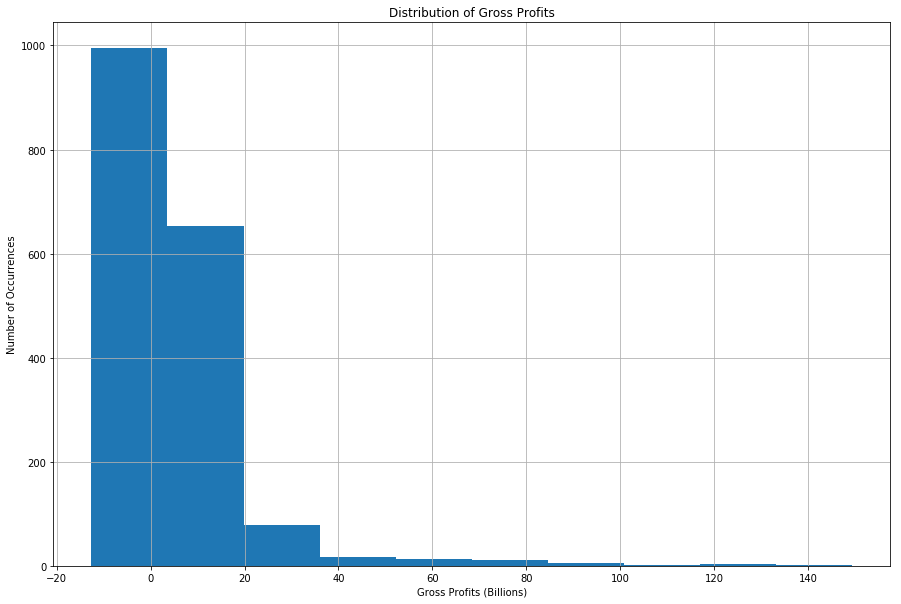

In [81]:
fun_actual['Gross Profit'].plot(kind = 'hist', figsize = (15, 10))
plt.grid(True)
plt.xlabel("Gross Profits (Billions)")
plt.ylabel('Number of Occurrences')
plt.title("Distribution of Gross Profits")

Data Preprocessing and
getting the relavant columns for the fundamentals dataset

In [10]:
fun_actual = fundamentals.loc[:, ['Ticker Symbol', 'Gross Profit']]
fun_actual

,Ticker Symbol,Gross Profit
0,AAL,14.356000
1,AAL,15.724000
2,AAL,27.030000
3,AAL,29.894000
4,AAP,3.098036
5,AAP,3.252146
6,AAP,4.453613
7,AAP,4.422772
8,AAPL,64.304000
9,AAPL,70.537000


In [11]:
fun_actual = pd.DataFrame(fun_actual)
fun_actual.head(10)   
# Note: Gross Profit is in Billions

,Ticker Symbol,Gross Profit
0,AAL,14.356000
1,AAL,15.724000
2,AAL,27.030000
3,AAL,29.894000
4,AAP,3.098036
5,AAP,3.252146
6,AAP,4.453613
7,AAP,4.422772
8,AAPL,64.304000
9,AAPL,70.537000


Getting relevant columns from the securities dataset 


In [12]:
securities.columns

Index(['Ticker symbol', 'Security', 'SEC filings', 'GICS Sector',
       'GICS Sub Industry', 'Address of Headquarters', 'Date first added',
       'CIK'],
      dtype='object')

In [13]:
# Getting the unique values 
securities['Ticker symbol'].unique()

# The number of unique values 
securities['Ticker symbol'].nunique()

# There are 505 unique values. This means there are 505 companies in the dataset

array(['MMM', 'ABT', 'ABBV', 'ACN', 'ATVI', 'AYI', 'ADBE', 'AAP', 'AES',
       'AET', 'AMG', 'AFL', 'A', 'APD', 'AKAM', 'ALK', 'ALB', 'ALXN',
       'ALLE', 'AGN', 'ADS', 'LNT', 'ALL', 'GOOGL', 'GOOG', 'MO', 'AMZN',
       'AEE', 'AAL', 'AEP', 'AXP', 'AIG', 'AMT', 'AWK', 'AMP', 'ABC',
       'AME', 'AMGN', 'APH', 'APC', 'ADI', 'ANTM', 'AON', 'APA', 'AIV',
       'AAPL', 'AMAT', 'ADM', 'ARNC', 'AJG', 'AIZ', 'T', 'ADSK', 'ADP',
       'AN', 'AZO', 'AVB', 'AVY', 'BHI', 'BLL', 'BAC', 'BCR', 'BAX',
       'BBT', 'BDX', 'BBBY', 'BRK.B', 'BBY', 'BIIB', 'BLK', 'HRB', 'BA',
       'BWA', 'BXP', 'BSX', 'BMY', 'AVGO', 'BF.B', 'CHRW', 'CA', 'COG',
       'CPB', 'COF', 'CAH', 'KMX', 'CCL', 'CAT', 'CBG', 'CBS', 'CELG',
       'CNC', 'CNP', 'CTL', 'CERN', 'CF', 'SCHW', 'CHTR', 'CHK', 'CVX',
       'CMG', 'CB', 'CHD', 'CI', 'XEC', 'CINF', 'CTAS', 'CSCO', 'C',
       'CFG', 'CTXS', 'CME', 'CMS', 'COH', 'KO', 'CTSH', 'CL', 'CMCSA',
       'CMA', 'CAG', 'CXO', 'COP', 'ED', 'STZ', 'GLW', 'COST', 'COTY',


505

In [14]:
sec_actual = securities.loc[:, ['Ticker symbol','Security', 'GICS Sector']]
sec_actual = pd.DataFrame(sec_actual)
sec_actual.head(10)

,Ticker symbol,Security,GICS Sector
0,MMM,3M Company,Industrials
1,ABT,Abbott Laboratories,Health Care
2,ABBV,AbbVie,Health Care
3,ACN,Accenture plc,Information Technology
4,ATVI,Activision Blizzard,Information Technology
5,AYI,Acuity Brands Inc,Industrials
6,ADBE,Adobe Systems Inc,Information Technology
7,AAP,Advance Auto Parts,Consumer Discretionary
8,AES,AES Corp,Utilities
9,AET,Aetna Inc,Health Care


## Final look at the 2 datasets


In [72]:
fun_actual.head(10)
sec_actual.head(10)

,Ticker Symbol,Gross Profit
0,AAL,14.356000
1,AAL,15.724000
2,AAL,27.030000
3,AAL,29.894000
4,AAP,3.098036
5,AAP,3.252146
6,AAP,4.453613
7,AAP,4.422772
8,AAPL,64.304000
9,AAPL,70.537000


,Ticker symbol,Security,GICS Sector
0,MMM,3M Company,Industrials
1,ABT,Abbott Laboratories,Health Care
2,ABBV,AbbVie,Health Care
3,ACN,Accenture plc,Information Technology
4,ATVI,Activision Blizzard,Information Technology
5,AYI,Acuity Brands Inc,Industrials
6,ADBE,Adobe Systems Inc,Information Technology
7,AAP,Advance Auto Parts,Consumer Discretionary
8,AES,AES Corp,Utilities
9,AET,Aetna Inc,Health Care


## Merging the 2 datasets


In [15]:

sec_actual['Ticker Symbol'] = sec_actual['Ticker symbol']
sec_actual.head(10)

,Ticker symbol,Security,GICS Sector,Ticker Symbol
0,MMM,3M Company,Industrials,MMM
1,ABT,Abbott Laboratories,Health Care,ABT
2,ABBV,AbbVie,Health Care,ABBV
3,ACN,Accenture plc,Information Technology,ACN
4,ATVI,Activision Blizzard,Information Technology,ATVI
5,AYI,Acuity Brands Inc,Industrials,AYI
6,ADBE,Adobe Systems Inc,Information Technology,ADBE
7,AAP,Advance Auto Parts,Consumer Discretionary,AAP
8,AES,AES Corp,Utilities,AES
9,AET,Aetna Inc,Health Care,AET


In [16]:
sec_actual.drop(['Ticker symbol'], axis = 1)
sec_actual.head(10)

,Security,GICS Sector,Ticker Symbol
0,3M Company,Industrials,MMM
1,Abbott Laboratories,Health Care,ABT
2,AbbVie,Health Care,ABBV
3,Accenture plc,Information Technology,ACN
4,Activision Blizzard,Information Technology,ATVI
5,Acuity Brands Inc,Industrials,AYI
6,Adobe Systems Inc,Information Technology,ADBE
7,Advance Auto Parts,Consumer Discretionary,AAP
8,AES Corp,Utilities,AES
9,Aetna Inc,Health Care,AET


,Ticker symbol,Security,GICS Sector,Ticker Symbol
0,MMM,3M Company,Industrials,MMM
1,ABT,Abbott Laboratories,Health Care,ABT
2,ABBV,AbbVie,Health Care,ABBV
3,ACN,Accenture plc,Information Technology,ACN
4,ATVI,Activision Blizzard,Information Technology,ATVI
5,AYI,Acuity Brands Inc,Industrials,AYI
6,ADBE,Adobe Systems Inc,Information Technology,ADBE
7,AAP,Advance Auto Parts,Consumer Discretionary,AAP
8,AES,AES Corp,Utilities,AES
9,AET,Aetna Inc,Health Care,AET


In [17]:
data = fun_actual.merge(sec_actual, on = 'Ticker Symbol', how = 'inner')
data.head(10)

,Ticker Symbol,Gross Profit,Ticker symbol,Security,GICS Sector
0,AAL,14.356000,AAL,American Airlines Group,Industrials
1,AAL,15.724000,AAL,American Airlines Group,Industrials
2,AAL,27.030000,AAL,American Airlines Group,Industrials
3,AAL,29.894000,AAL,American Airlines Group,Industrials
4,AAP,3.098036,AAP,Advance Auto Parts,Consumer Discretionary
5,AAP,3.252146,AAP,Advance Auto Parts,Consumer Discretionary
6,AAP,4.453613,AAP,Advance Auto Parts,Consumer Discretionary
7,AAP,4.422772,AAP,Advance Auto Parts,Consumer Discretionary
8,AAPL,64.304000,AAPL,Apple Inc.,Information Technology
9,AAPL,70.537000,AAPL,Apple Inc.,Information Technology


## This is our final dataset

In [18]:
# Dropping the extra 'Ticker symbol' column 

data = data.drop(['Ticker symbol'], axis = 1)
data.head(10)


,Ticker Symbol,Gross Profit,Security,GICS Sector
0,AAL,14.356000,American Airlines Group,Industrials
1,AAL,15.724000,American Airlines Group,Industrials
2,AAL,27.030000,American Airlines Group,Industrials
3,AAL,29.894000,American Airlines Group,Industrials
4,AAP,3.098036,Advance Auto Parts,Consumer Discretionary
5,AAP,3.252146,Advance Auto Parts,Consumer Discretionary
6,AAP,4.453613,Advance Auto Parts,Consumer Discretionary
7,AAP,4.422772,Advance Auto Parts,Consumer Discretionary
8,AAPL,64.304000,Apple Inc.,Information Technology
9,AAPL,70.537000,Apple Inc.,Information Technology


## We are going to choose 4 GICS Sectors: Industrials, Health Care, Information Technology, and Telecommunications Services


In [19]:

data_ind = data[data['GICS Sector'] == 'Industrials']

In [91]:
data_ind.groupby(['Ticker Symbol', 'Security','GICS Sector'])['Gross Profit'].max()

Ticker Symbol  Security                        GICS Sector
AAL            American Airlines Group         Industrials    29.894000
ALK            Alaska Air Group Inc            Industrials     3.663000
ALLE           Allegion                        Industrials     0.985300
AME            AMETEK Inc                      Industrials     1.425015
ARNC           Arconic Inc                     Industrials     4.769000
AYI            Acuity Brands Inc               Industrials     1.436200
BA             Boeing Company                  Industrials    14.026000
CAT            Caterpillar Inc.                Industrials    14.202000
CHRW           C. H. Robinson Worldwide        Industrials     2.268480
CMI            Cummins Inc.                    Industrials     4.947000
COL            Rockwell Collins                Industrials     1.617000
CSX            CSX Corp.                       Industrials     8.569000
CTAS           Cintas Corporation              Industrials     2.129870
DAL  

## UPS has the highest average Gross Profit in the Industrial Sector

In [92]:
data_ind.loc[data_ind['Gross Profit'].idxmax()]


Ticker Symbol                      UPS
Gross Profit                    45.416
Security         United Parcel Service
GICS Sector                Industrials
Name: 1609, dtype: object

## Telecommunications Services


In [20]:

data_tel = data[data['GICS Sector'] == 'Telecommunications Services']

In [98]:
data_tel.groupby(['Ticker Symbol', 'Security','GICS Sector'])['Gross Profit'].max()

Ticker Symbol  Security                 GICS Sector                
CTL            CenturyLink Inc          Telecommunications Services    10.737
FTR            Frontier Communications  Telecommunications Services     5.576
LVLT           Level 3 Communications   Telecommunications Services     3.964
T              AT&T Inc                 Telecommunications Services    79.755
VZ             Verizon Communications   Telecommunications Services    79.063
Name: Gross Profit, dtype: float64

## AT&T has the highest average Gross Profit in the Telecommunications Services sector

In [99]:
data_tel.loc[data_tel['Gross Profit'].idxmax()]



Ticker Symbol                              T
Gross Profit                          79.755
Security                            AT&T Inc
GICS Sector      Telecommunications Services
Name: 1497, dtype: object

##  Information Technology


In [21]:

data_IT = data[data['GICS Sector'] == 'Information Technology']

In [101]:
data_IT.groupby(['Ticker Symbol', 'Security','GICS Sector'])['Gross Profit'].max()

Ticker Symbol  Security                                GICS Sector           
AAPL           Apple Inc.                              Information Technology    93.626000
ADBE           Adobe Systems Inc                       Information Technology     5.034522
ADI            Analog Devices, Inc.                    Information Technology     2.259262
ADS            Alliance Data Systems                   Information Technology     1.957046
ADSK           Autodesk Inc                            Information Technology     2.170100
AKAM           Akamai Technologies Inc                 Information Technology     1.471828
AMAT           Applied Materials Inc                   Information Technology     4.511000
APH            Amphenol Corp                           Information Technology     1.779500
ATVI           Activision Blizzard                     Information Technology     3.194000
AVGO           Broadcom                                Information Technology     5.940000
CRM         

## Apple has the highest average Gross Profit in the Information Technology sector

In [104]:
data_IT.loc[data_IT['Gross Profit'].idxmax()]


Ticker Symbol                      AAPL
Gross Profit                     93.626
Security                     Apple Inc.
GICS Sector      Information Technology
Name: 10, dtype: object

## Health Care Sector


In [22]:

data_health = data[data['GICS Sector'] == 'Health Care']

In [106]:
data_health.groupby(['Ticker Symbol', 'Security','GICS Sector'])['Gross Profit'].max()

Ticker Symbol  Security                             GICS Sector
ABBV           AbbVie                               Health Care    18.359000
ABC            AmerisourceBergen Corp               Health Care     4.272606
ABT            Abbott Laboratories                  Health Care    11.658000
ALXN           Alexion Pharmaceuticals              Health Care     2.826000
AMGN           Amgen Inc                            Health Care    18.829000
ANTM           Anthem Inc.                          Health Care    18.039600
BAX            Baxter International Inc.            Health Care     7.134000
BCR            Bard (C.R.) Inc.                     Health Care     2.342300
BDX            Becton Dickinson                     Health Care     5.991000
BIIB           BIOGEN IDEC Inc.                     Health Care     9.970100
BMY            Bristol-Myers Squibb                 Health Care    13.011000
BSX            Boston Scientific                    Health Care     5.304000
CAH         

## United Health Group has the highest average Gross Profit in the Health Care Sector

In [107]:
data_health.loc[data_health['Gross Profit'].idxmax()]



Ticker Symbol                         UNH
Gross Profit                       67.802
Security         United Health Group Inc.
GICS Sector                   Health Care
Name: 1597, dtype: object

# There are 4 companies for which we are predicting the stock prices for using Recurrent Neural Networks: 

#### 1. United Parcel Services (UPS)  Industrial Sector
#### 2. AT&T                          Telecommunications Services 
#### 3. Apple                         Information Technology Sector
#### 4. United Health Group           Health Care Sector

# RNN for United Parcel Services (UPS)

In [110]:
prices.shape

(851264, 7)

In [111]:
prices.head(10)

,date,symbol,open,close,low,high,volume
0,2016-01-05,WLTW,123.430000,125.839996,122.309998,126.250000,2163600
1,2016-01-06,WLTW,125.239998,119.980003,119.940002,125.540001,2386400
2,2016-01-07,WLTW,116.379997,114.949997,114.930000,119.739998,2489500
3,2016-01-08,WLTW,115.480003,116.620003,113.500000,117.440002,2006300
4,2016-01-11,WLTW,117.010002,114.970001,114.089996,117.330002,1408600
5,2016-01-12,WLTW,115.510002,115.550003,114.500000,116.059998,1098000
6,2016-01-13,WLTW,116.459999,112.849998,112.589996,117.070000,949600
7,2016-01-14,WLTW,113.510002,114.379997,110.050003,115.029999,785300
8,2016-01-15,WLTW,113.330002,112.529999,111.919998,114.879997,1093700
9,2016-01-19,WLTW,113.660004,110.379997,109.870003,115.870003,1523500


## Filtering to only get prices for UPS 
## We are going to make a RNN model to predict the stock price for December 2016

In [116]:

prices_ups = prices[prices['symbol'] == 'UPS']
prices_ups.head(30)
prices_ups.tail(30)



,date,symbol,open,close,low,high,volume
675,2010-01-04,UPS,58.180000,58.180000,57.980000,58.820000,3897200
1143,2010-01-05,UPS,58.250000,58.279999,58.119999,59.000000,5966300
1611,2010-01-06,UPS,58.209999,57.849998,57.810001,58.270000,5770200
2079,2010-01-07,UPS,57.959999,57.410000,57.189999,57.959999,5747000
2547,2010-01-08,UPS,59.770000,60.169998,59.520000,61.130001,13779300
3015,2010-01-11,UPS,60.549999,62.820000,60.500000,63.380001,13744900
3483,2010-01-12,UPS,62.520000,62.400002,62.099998,62.939999,5662500
3951,2010-01-13,UPS,63.130001,62.070000,61.930000,63.220001,5822600
4419,2010-01-14,UPS,61.860001,62.200001,61.830002,62.360001,4698000
4887,2010-01-15,UPS,62.200001,61.930000,61.720001,62.400002,6066300


,date,symbol,open,close,low,high,volume
836717,2016-11-17,UPS,112.919998,113.489998,112.510002,113.559998,1618300
837217,2016-11-18,UPS,113.730003,114.089996,113.250000,114.309998,1987800
837717,2016-11-21,UPS,114.089996,114.699997,113.620003,114.730003,1849200
838217,2016-11-22,UPS,114.940002,114.629997,114.400002,115.000000,1983900
838717,2016-11-23,UPS,114.849998,115.680000,114.849998,115.750000,1855400
839217,2016-11-25,UPS,115.790001,116.260002,115.769997,116.389999,1077600
839717,2016-11-28,UPS,116.260002,115.690002,115.449997,116.470001,2628600
840217,2016-11-29,UPS,115.940002,116.279999,115.769997,116.480003,2733500
840717,2016-11-30,UPS,116.459999,115.919998,115.919998,116.959999,3318200
841217,2016-12-01,UPS,116.040001,116.430000,115.879997,116.760002,2484200


In [127]:
dataset_train = prices_ups[prices_ups['date'] < '2016-12-01']
training_set = dataset_train.iloc[:, 2:3].values

## We will train our data over the years 2010 to 2016

Text(0.5, 1.0, 'Stock Prices from January 2010 until November 2016')

Text(0.5, 0, 'Time')

Text(0, 0.5, 'Stock Prices')

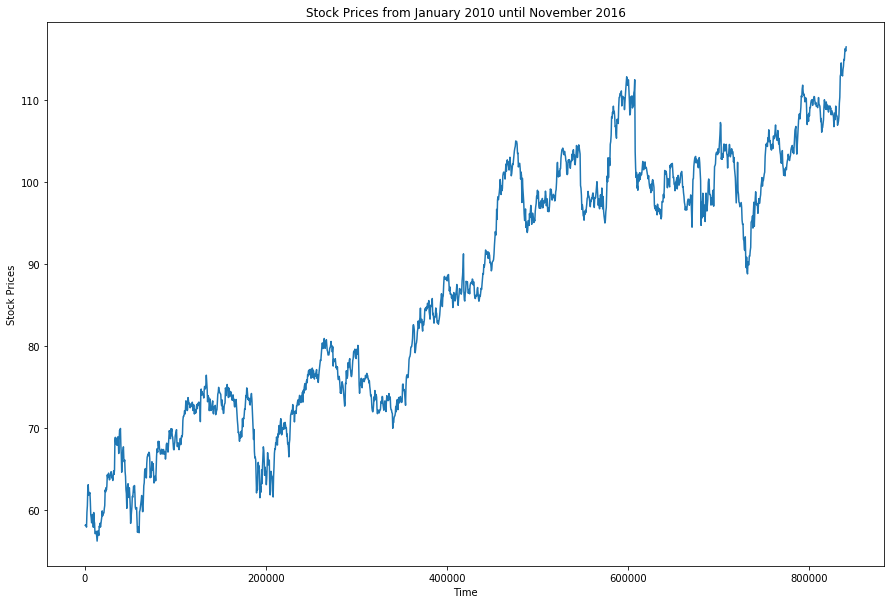

In [151]:
dataset_train['open'].plot(figsize = (15, 10))                       # Training Set 
plt.title('Stock Prices from January 2010 until November 2016')      
plt.xlabel("Time")
plt.ylabel('Stock Prices')  



# One of the advantages of using RNN is that we do not need to make the data stationary. Recurrent Neural Networks are robust to noise in the input data, and do not make any assumptions about the mapping functions. RNN can readily learn linear and non linear relationships. 

In [128]:
# Feature Scaling
# Feature scaling is an important part of RNN because the calculations are very computer intensive and therefore it is necessary for the values to be between 0 and 1.

from sklearn.preprocessing import MinMaxScaler

sc = MinMaxScaler(feature_range = (0,1))

training_set_scaled = sc.fit_transform(training_set)

In [129]:
training_set_scaled.shape

(1741, 1)

Creating a data structure with 60 timesteps and 1 output. 60 timesteps means that at each time 't', RNN is going to look at 60 stockprices before time 't' i.e. stockprices that are 60 days before time 't' and based on the trends, it will predict the next output. 

Since, there are 20 financial days in 1 month, 60 timesteps would equal to 3 months. Therefore, we are using 3 months of previous data in order to predict the opening stock price for the next day. 

Now, X_train contains 60 previous price days and y_train contains the next output. 

In [130]:

X_train = []
y_train = []

for i in range(60, 1741):
    
    X_train.append(training_set_scaled[i - 60:i , 0])
    y_train.append(training_set_scaled[i , 0])

X_train, y_train = np.array(X_train), np.array(y_train)

In [28]:
# Reshaping to add new dimension 

X_train = np.reshape(X_train, (1681, 60, 1))

Here, 1681 is the total number of stock prices we have, 60 is the number of timesteps, and 1 is the number of predictors i.e. the opening stock price

In [133]:
# Building the RNN

import tensorflow
tensorflow.__version__

from tensorflow import keras

keras.__version__

'1.13.1'

'2.2.4-tf'

In [134]:
# Importing the Packages

from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout

# Initialising the RNN

regressor = Sequential()

Using TensorFlow backend.


In [135]:
# Adding the first LSTM layer and some dropout regularisation 

regressor.add(LSTM(units = 50, return_sequences = True, input_shape = (60 , 1)))
regressor.add(Dropout(0.2))

# Adding the second LSTM layer and some dropout regularisation 

regressor.add(LSTM(units = 50, return_sequences = True))
regressor.add(Dropout(0.2))

# Adding the third LSTM layer and some dropout regularisation 

regressor.add(LSTM(units = 50, return_sequences = True))
regressor.add(Dropout(0.2))

# Adding the fourth LSTM layer and some dropout regularisation 

regressor.add(LSTM(units = 50))


# Adding the output layer

regressor.add(Dense(units = 1))

Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


'units = 50' is the number of LSTM cells i.e. the number if neurons in the first LSTM layer. We have chosen 50 to get high dimensionality and capture complex trends. 

'return_sequences = True' means we are adding another LSTM layer afterwards. 

'Dropout(0.2)' means 20% of the neurons in the LSTM layers will be ignored during each iteration to prevent overfitting. 

In [136]:
# Compiling the RNN

regressor.compile(optimizer = 'adam', loss = 'mean_squared_error')

In [137]:
# Fitting the RNN

regressor.fit(X_train, y_train, epochs = 50, batch_size = 32)

# Started with a loss of 0.0308
# Ended with a loss of 0.00071

Instructions for updating:
Use tf.cast instead.
Epoch 1/50
1681/1681 [==============================] - 39s 23ms/step - loss: 0.0308
Epoch 2/50
1681/1681 [==============================] - 29s 18ms/step - loss: 0.0032
Epoch 3/50
1681/1681 [==============================] - 29s 17ms/step - loss: 0.0027
Epoch 4/50
1681/1681 [==============================] - 29s 17ms/step - loss: 0.0026
Epoch 5/50
1681/1681 [==============================] - 29s 17ms/step - loss: 0.0026
Epoch 6/50
1681/1681 [==============================] - 29s 17ms/step - loss: 0.0024
Epoch 7/50
1681/1681 [==============================] - 29s 18ms/step - loss: 0.0026
Epoch 8/50
1681/1681 [==============================] - 30s 18ms/step - loss: 0.0021
Epoch 9/50
1681/1681 [==============================] - 29s 17ms/step - loss: 0.0023
Epoch 10/50
1681/1681 [==============================] - 29s 17ms/step - loss: 0.0022
Epoch 11/50
1681/1681 [==============================] - 29s 17ms/step - loss: 0.0020
Epoch 12/50
168

In [138]:
dataset_test = prices_ups[prices_ups['date'] > '2016-11-30']   # opening prices for December 2016 (The testing data)
dataset_test.head()

,date,symbol,open,close,low,high,volume
841217,2016-12-01,UPS,116.040001,116.430000,115.879997,116.760002,2484200
841717,2016-12-02,UPS,116.690002,116.349998,116.000000,117.010002,2084900
842217,2016-12-05,UPS,116.910004,116.559998,116.360001,116.949997,2304900
842717,2016-12-06,UPS,116.500000,116.540001,116.029999,116.720001,1735600
843217,2016-12-07,UPS,116.269997,118.620003,116.269997,118.790001,2495100


Text(0.5, 1.0, 'Stock Prices for December 2016')

Text(0.5, 0, 'Time')

Text(0, 0.5, 'Stock Prices')

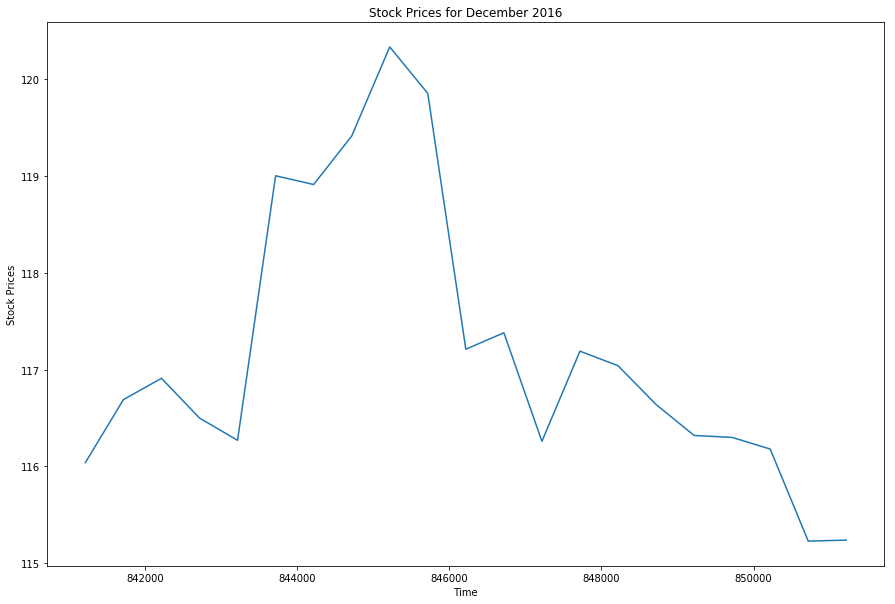

In [152]:
dataset_test['open'].plot(figsize = (15, 10))                       # Testing Set 

plt.title('Stock Prices for December 2016')      

plt.xlabel("Time")

plt.ylabel('Stock Prices')

In [139]:
real_stock_price = dataset_test.iloc[:, 2:3].values

In [143]:
###### Getting the predicted stock price of December 2016 ########

# Concatenating the training set and test set

dataset_total_ups = pd.concat((dataset_train['open'], 
                           dataset_test['open']), axis = 0)

inputs_ups = dataset_total_ups[len(dataset_total_ups) - len(dataset_test) - 60:].values   # Inputs we need to predict the stock price of December 2016

In [144]:
# Reshaping to get the right np shape

inputs_ups = inputs_ups.reshape(-1, 1)

inputs_ups = sc.transform(inputs_ups)

# Creating special dataset structure for our test set

X_test_ups = []     # This will be the inputs we need to predict the value of the test set

# Since the test set only contains 20 financial days, our range will be from 60 to 80

for i in range(60, 80):
    X_test_ups.append(inputs_ups[i - 60:i, 0])
     
X_test_ups = np.array(X_test_ups)

X_test_ups = np.reshape(X_test_ups, (20, 60, 1)) 

# Here, '20' is the number of days to predict and 60 is the number of timesteps. 

In [145]:
predicted_stock_price_ups = regressor.predict(X_test_ups)        # Predicting the stock price

predicted_stock_price_ups = sc.inverse_transform(predicted_stock_price_ups)

Text(0.5, 1.0, 'Stock Price Prediction')

Text(0.5, 0, 'Time')

Text(0, 0.5, 'Stock Price')

<function matplotlib.pyplot.show(*args, **kw)>

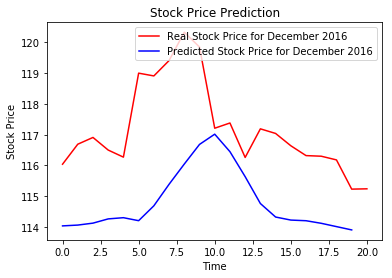

In [146]:
# Visualizing the results 

plt.plot(real_stock_price, color = 'red', label = 'Real Stock Price for December 2016')    

plt.plot(predicted_stock_price_ups, color = 'blue', label = 'Predicted Stock Price for December 2016')

plt.title('Stock Price Prediction')

plt.xlabel('Time')

plt.ylabel('Stock Price')

plt.legend()

plt.show

## As our predicted trend line is following the actual trend, our investor would capitalize on by buying the stock just before the we predicted the rise in the stock, The investor is making a profit when the price starts to increase and also our investor can sell his stock just before our predicted fall in stock price and save his hard earned money.

# RNN for AT&T

In [23]:
# Filtering to only get prices for AT&T 

prices_T = prices[prices['symbol'] == 'T']
prices_T.head(30)
prices_T.tail(30)

# We are going to make a RNN model to predict the stock price for December 2016

,date,symbol,open,close,low,high,volume
648,2010-01-04,T,28.410000,28.580000,28.280001,28.610001,29136600
1116,2010-01-05,T,28.700001,28.440001,28.350000,28.730000,35234500
1584,2010-01-06,T,27.950001,27.610001,27.549999,28.030001,37894600
2052,2010-01-07,T,27.580000,27.299999,27.120001,27.690001,33600300
2520,2010-01-08,T,27.290001,27.100000,26.879999,27.389999,27633400
2988,2010-01-11,T,27.180000,26.969999,26.850000,27.219999,25791200
3456,2010-01-12,T,26.850000,26.959999,26.780001,27.110001,26307800
3924,2010-01-13,T,27.000000,26.639999,26.530001,27.100000,42590900
4392,2010-01-14,T,26.639999,26.190001,26.080000,26.850000,42246100
4860,2010-01-15,T,26.250000,25.790001,25.650000,26.270000,64018300


,date,symbol,open,close,low,high,volume
836688,2016-11-17,T,37.299999,37.410000,37.270000,37.689999,21184900
837188,2016-11-18,T,37.450001,37.560001,37.299999,37.610001,16982200
837688,2016-11-21,T,37.669998,37.740002,37.459999,37.740002,17247400
838188,2016-11-22,T,37.990002,38.549999,37.820000,38.740002,26152000
838688,2016-11-23,T,38.419998,38.730000,38.410000,38.970001,21343400
839188,2016-11-25,T,38.770000,39.209999,38.730000,39.209999,10844400
839688,2016-11-28,T,39.180000,39.540001,39.169998,39.669998,26656500
840188,2016-11-29,T,39.580002,39.480000,39.270000,39.630001,19857200
840688,2016-11-30,T,39.209999,38.630001,38.619999,39.209999,32679300
841188,2016-12-01,T,38.630001,38.880001,38.160000,38.910000,27398400


In [24]:
dataset_train = prices_T[prices_T['date'] < '2016-12-01']
training_set = dataset_train.iloc[:, 2:3].values

Text(0.5, 1.0, 'Stock Prices from January 2010 until November 2016')

Text(0.5, 0, 'Time')

Text(0, 0.5, 'Stock Prices')

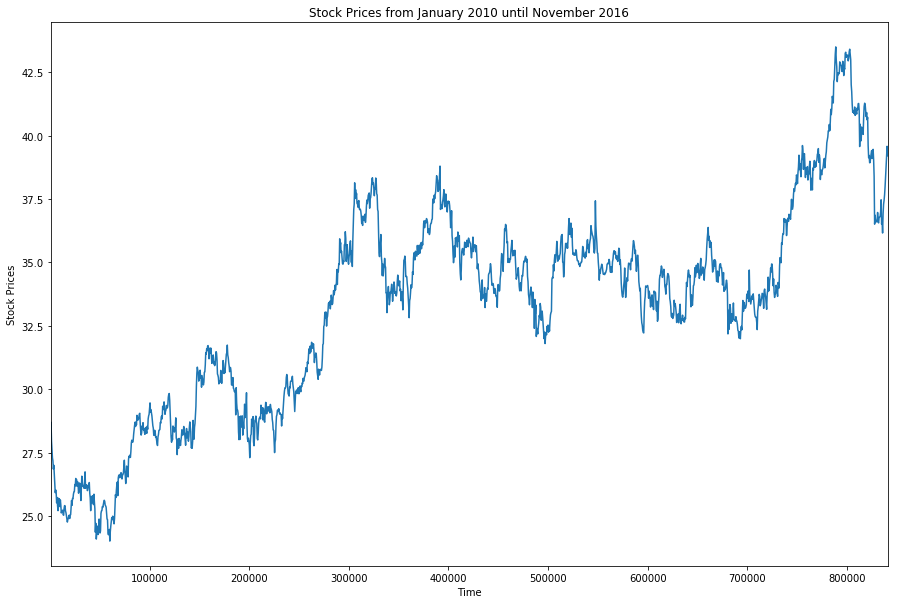

In [25]:
dataset_train['open'].plot(figsize = (15, 10))                       # Training Set 
plt.title('Stock Prices from January 2010 until November 2016')      
plt.xlabel("Time")
plt.ylabel('Stock Prices')  

# We will train our data over these years

In [26]:
# Feature Scaling

from sklearn.preprocessing import MinMaxScaler

sc = MinMaxScaler(feature_range = (0,1))

training_set_scaled = sc.fit_transform(training_set)

In [27]:
training_set_scaled.shape

(1741, 1)

In [28]:
# Creating a data structure with 60 timesteps and 1 output

X_train = []
y_train = []

for i in range(60, 1741):
    
    X_train.append(training_set_scaled[i - 60:i , 0])
    y_train.append(training_set_scaled[i , 0])

X_train, y_train = np.array(X_train), np.array(y_train)

In [29]:
# Reshaping to add new dimension 

X_train = np.reshape(X_train, (1681, 60, 1))

In [30]:
# Building the RNN

import tensorflow
tensorflow.__version__

from tensorflow import keras

keras.__version__

'1.13.1'

'2.2.4-tf'

In [32]:
# Importing the Packages

from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout

# Initialising the RNN

regressor = Sequential()

In [33]:
# Adding the first LSTM layer and some dropout regularisation 

regressor.add(LSTM(units = 50, return_sequences = True, input_shape = (60 , 1)))
regressor.add(Dropout(0.2))

# Adding the second LSTM layer and some dropout regularisation 

regressor.add(LSTM(units = 50, return_sequences = True))
regressor.add(Dropout(0.2))

# Adding the third LSTM layer and some dropout regularisation 

regressor.add(LSTM(units = 50, return_sequences = True))
regressor.add(Dropout(0.2))

# Adding the fourth LSTM layer and some dropout regularisation 

regressor.add(LSTM(units = 50))


# Adding the output layer

regressor.add(Dense(units = 1))

Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


In [34]:
# Compiling the RNN

regressor.compile(optimizer = 'adam', loss = 'mean_squared_error')

In [35]:
# Fitting the RNN

regressor.fit(X_train, y_train, epochs = 50, batch_size = 32)

# Started with a loss of 0.0314
# Ended with a loss of 0.00046

Instructions for updating:
Use tf.cast instead.
Epoch 1/50
1681/1681 [==============================] - 9s 6ms/step - loss: 0.0314
Epoch 2/50
1681/1681 [==============================] - 6s 3ms/step - loss: 0.0032
Epoch 3/50
1681/1681 [==============================] - 6s 4ms/step - loss: 0.0032
Epoch 4/50
1681/1681 [==============================] - 6s 4ms/step - loss: 0.0029
Epoch 5/50
1681/1681 [==============================] - 6s 3ms/step - loss: 0.0027
Epoch 6/50
1681/1681 [==============================] - 6s 4ms/step - loss: 0.0027
Epoch 7/50
1681/1681 [==============================] - 6s 3ms/step - loss: 0.0026
Epoch 8/50
1681/1681 [==============================] - 6s 3ms/step - loss: 0.0024
Epoch 9/50
1681/1681 [==============================] - 6s 3ms/step - loss: 0.0023
Epoch 10/50
1681/1681 [==============================] - 6s 3ms/step - loss: 0.0022
Epoch 11/50
1681/1681 [==============================] - 6s 4ms/step - loss: 0.0022
Epoch 12/50
1681/1681 [==============

In [36]:
dataset_test = prices_T[prices_T['date'] > '2016-11-30']   # opening prices for December 2016 (The testing data)
dataset_test.head()

,date,symbol,open,close,low,high,volume
841188,2016-12-01,T,38.630001,38.880001,38.160000,38.910000,27398400
841688,2016-12-02,T,38.840000,38.610001,38.470001,39.119999,16102200
842188,2016-12-05,T,38.700001,38.630001,38.630001,38.980000,20773400
842688,2016-12-06,T,38.779999,39.349998,38.700001,39.419998,23569800
843188,2016-12-07,T,39.490002,40.450001,39.439999,40.490002,32963400


Text(0.5, 1.0, 'Stock Prices for December 2016')

Text(0.5, 0, 'Time')

Text(0, 0.5, 'Stock Prices')

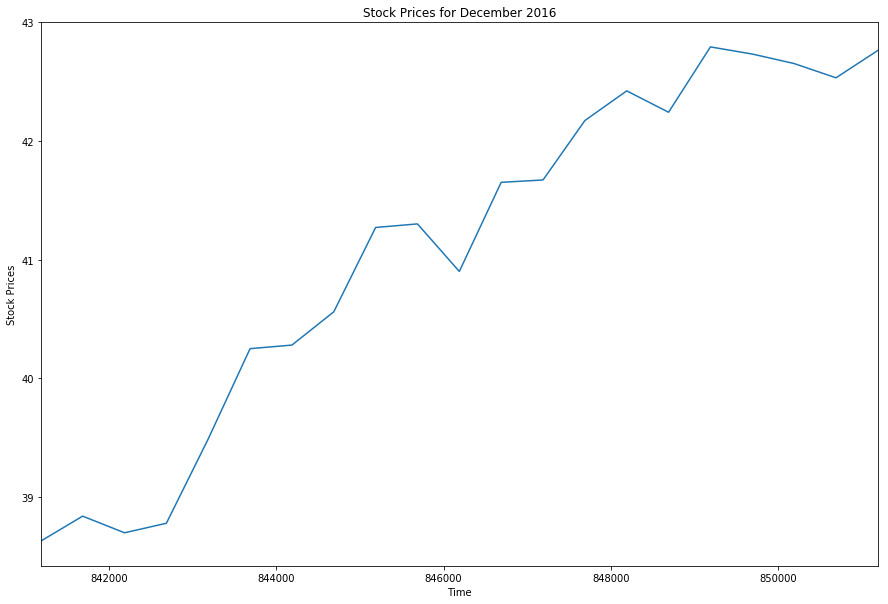

In [37]:
dataset_test['open'].plot(figsize = (15, 10))                       # Testing Set 

plt.title('Stock Prices for December 2016')      

plt.xlabel("Time")

plt.ylabel('Stock Prices')

In [38]:
real_stock_price = dataset_test.iloc[:, 2:3].values

In [39]:
###### Getting the predicted stock price of December 2016 ########

# Concatenating the training set and test set

dataset_total_T = pd.concat((dataset_train['open'], 
                           dataset_test['open']), axis = 0)

inputs_T = dataset_total_T[len(dataset_total_T) - len(dataset_test) - 60:].values   # Inputs we need to predict the stock price of December 2016

In [40]:
# Reshaping to get the right np shape

inputs_T = inputs_T.reshape(-1, 1)

inputs_T = sc.transform(inputs_T)

# Creating special dataset structure for our test set

X_test_T = []     # This will be the inputs we need to predict the value of the test set

# Since the test set only contains 20 financial days, our range will be from 60 to 80

for i in range(60, 80):
    X_test_T.append(inputs_T[i - 60:i, 0])
     
X_test_T = np.array(X_test_T)

X_test_T = np.reshape(X_test_T, (20, 60, 1))

In [41]:
predicted_stock_price_T = regressor.predict(X_test_T)        # Predicting the stock price

predicted_stock_price_T = sc.inverse_transform(predicted_stock_price_T)

Text(0.5, 1.0, 'Stock Price Prediction')

Text(0.5, 0, 'Time')

Text(0, 0.5, 'Stock Price')

<function matplotlib.pyplot.show(*args, **kw)>

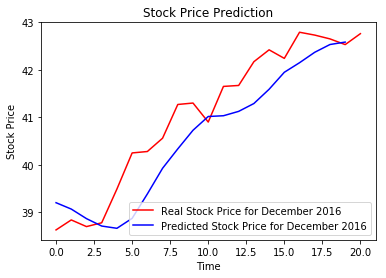

In [42]:
# Visualizing the results 

plt.plot(real_stock_price, color = 'red', label = 'Real Stock Price for December 2016')    

plt.plot(predicted_stock_price_T, color = 'blue', label = 'Predicted Stock Price for December 2016')

plt.title('Stock Price Prediction')

plt.xlabel('Time')

plt.ylabel('Stock Price')

plt.legend()

plt.show

# Running the RNN for Apple

In [116]:
# Filtering to only get prices for UPS and dropping the last 4 columns 

prices_AAP = prices[prices['symbol'] == 'AAPL']
prices_AAP.head(30)
prices_AAP.tail(30)

# We are going to make a RNN model to predict the stock price for December 2016

,date,symbol,open,close,low,high,volume
254,2010-01-04,AAPL,30.490000,30.572857,30.340000,30.642857,123432400
721,2010-01-05,AAPL,30.657143,30.625713,30.464285,30.798571,150476200
1189,2010-01-06,AAPL,30.625713,30.138571,30.107143,30.747143,138040000
1657,2010-01-07,AAPL,30.250000,30.082857,29.864286,30.285715,119282800
2125,2010-01-08,AAPL,30.042856,30.282858,29.865715,30.285715,111902700
2593,2010-01-11,AAPL,30.400000,30.015715,29.778572,30.428572,115557400
3061,2010-01-12,AAPL,29.884285,29.674286,29.488571,29.967142,148614900
3529,2010-01-13,AAPL,29.695715,30.092857,29.157143,30.132856,151473000
3997,2010-01-14,AAPL,30.015715,29.918571,29.860001,30.065714,108223500
4465,2010-01-15,AAPL,30.132856,29.418571,29.410000,30.228571,148516900


,date,symbol,open,close,low,high,volume
836267,2016-11-17,AAPL,109.809998,109.949997,108.830002,110.349998,27632000
836767,2016-11-18,AAPL,109.720001,110.059998,109.660004,110.540001,28428900
837267,2016-11-21,AAPL,110.120003,111.730003,110.010002,111.989998,29264600
837767,2016-11-22,AAPL,111.949997,111.800003,111.400002,112.419998,25965500
838267,2016-11-23,AAPL,111.360001,111.230003,110.330002,111.510002,27426400
838767,2016-11-25,AAPL,111.129997,111.790001,110.949997,111.870003,11475900
839267,2016-11-28,AAPL,111.430000,111.570000,111.389999,112.470001,27194000
839767,2016-11-29,AAPL,110.779999,111.459999,110.070000,112.029999,28528800
840267,2016-11-30,AAPL,111.599998,110.519997,110.269997,112.199997,36162300
840767,2016-12-01,AAPL,110.370003,109.489998,109.029999,110.940002,37086900


In [117]:
dataset_train = prices_AAP[prices_AAP['date'] < '2016-12-01']
training_set = dataset_train.iloc[:, 2:3].values

Text(0.5, 1.0, 'Stock Prices from January 2010 until November 2016')

Text(0.5, 0, 'Time')

Text(0, 0.5, 'Stock Prices')

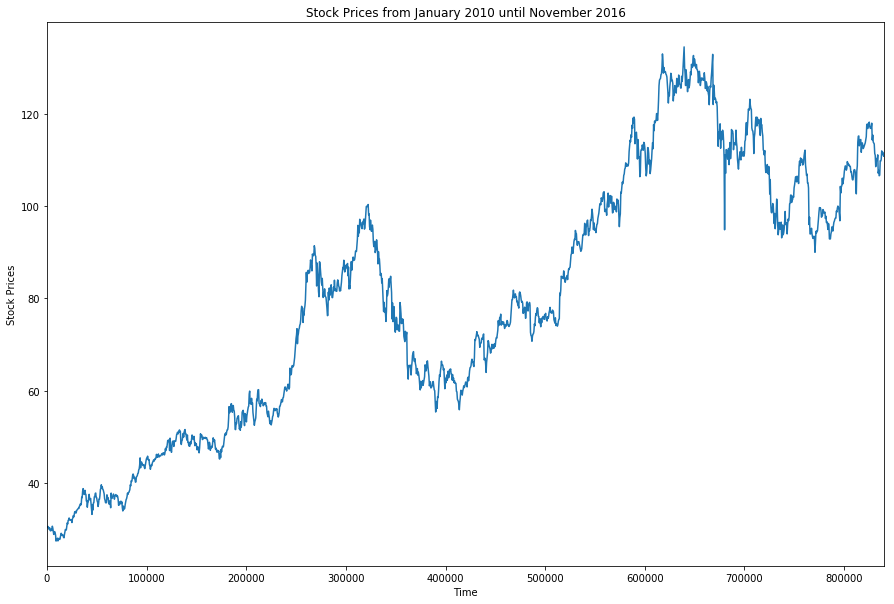

In [118]:
dataset_train['open'].plot(figsize = (15, 10))                       # Training Set 
plt.title('Stock Prices from January 2010 until November 2016')      
plt.xlabel("Time")
plt.ylabel('Stock Prices')  

# We will train our data over these years

In [119]:
# Feature Scaling

from sklearn.preprocessing import MinMaxScaler

sc = MinMaxScaler(feature_range = (0,1))

training_set_scaled = sc.fit_transform(training_set)

In [120]:
training_set_scaled.shape

(1741, 1)

In [121]:
# Creating a data structure with 60 timesteps and 1 output

X_train = []
y_train = []

for i in range(60, 1741):
    
    X_train.append(training_set_scaled[i - 60:i , 0])
    y_train.append(training_set_scaled[i , 0])

X_train, y_train = np.array(X_train), np.array(y_train)

In [122]:
# Reshaping to add new dimension 

X_train = np.reshape(X_train, (1681, 60, 1))

In [123]:
# Initialising the RNN

regressor = Sequential()

In [124]:
# Adding the first LSTM layer and some dropout regularisation 

regressor.add(LSTM(units = 50, return_sequences = True, input_shape = (60 , 1)))
regressor.add(Dropout(0.2))

# Adding the second LSTM layer and some dropout regularisation 

regressor.add(LSTM(units = 50, return_sequences = True))
regressor.add(Dropout(0.2))

# Adding the third LSTM layer and some dropout regularisation 

regressor.add(LSTM(units = 50, return_sequences = True))
regressor.add(Dropout(0.2))

# Adding the fourth LSTM layer and some dropout regularisation 

regressor.add(LSTM(units = 50))


# Adding the output layer

regressor.add(Dense(units = 1))

In [125]:
# Compiling the RNN

regressor.compile(optimizer = 'adam', loss = 'mean_squared_error')

In [126]:
# Fitting the RNN

regressor.fit(X_train, y_train, epochs = 100, batch_size = 32)

# Started with a loss of 0.0376
# Ended with a loss of 0.00041

Epoch 1/100
1681/1681 [==============================] - 6s 4ms/step - loss: 0.0364
Epoch 2/100
1681/1681 [==============================] - 4s 2ms/step - loss: 0.0025
Epoch 3/100
1681/1681 [==============================] - 4s 2ms/step - loss: 0.0026
Epoch 4/100
1681/1681 [==============================] - 4s 2ms/step - loss: 0.0023
Epoch 5/100
1681/1681 [==============================] - 5s 3ms/step - loss: 0.0022
Epoch 6/100
1681/1681 [==============================] - 5s 3ms/step - loss: 0.0022
Epoch 7/100
1681/1681 [==============================] - 5s 3ms/step - loss: 0.0022
Epoch 8/100
1681/1681 [==============================] - 5s 3ms/step - loss: 0.0023
Epoch 9/100
1681/1681 [==============================] - 5s 3ms/step - loss: 0.0020
Epoch 10/100
1681/1681 [==============================] - 5s 3ms/step - loss: 0.0018A: 0s - loss: 0.
Epoch 11/100
1681/1681 [==============================] - 5s 3ms/step - loss: 0.0017
Epoch 12/100
1681/1681 [==============================] - 

In [127]:
dataset_test = prices_AAP[prices_AAP['date'] > '2016-11-30']   # opening prices for December 2016 (The testing data)
dataset_test.head()

,date,symbol,open,close,low,high,volume
840767,2016-12-01,AAPL,110.370003,109.489998,109.029999,110.940002,37086900
841267,2016-12-02,AAPL,109.169998,109.900002,108.849998,110.089996,26528000
841767,2016-12-05,AAPL,110.000000,109.110001,108.250000,110.029999,34324500
842267,2016-12-06,AAPL,109.500000,109.949997,109.190002,110.360001,26195500
842767,2016-12-07,AAPL,109.260002,111.029999,109.160004,111.190002,29998700


Text(0.5, 1.0, 'Stock Prices for December 2016')

Text(0.5, 0, 'Time')

Text(0, 0.5, 'Stock Prices')

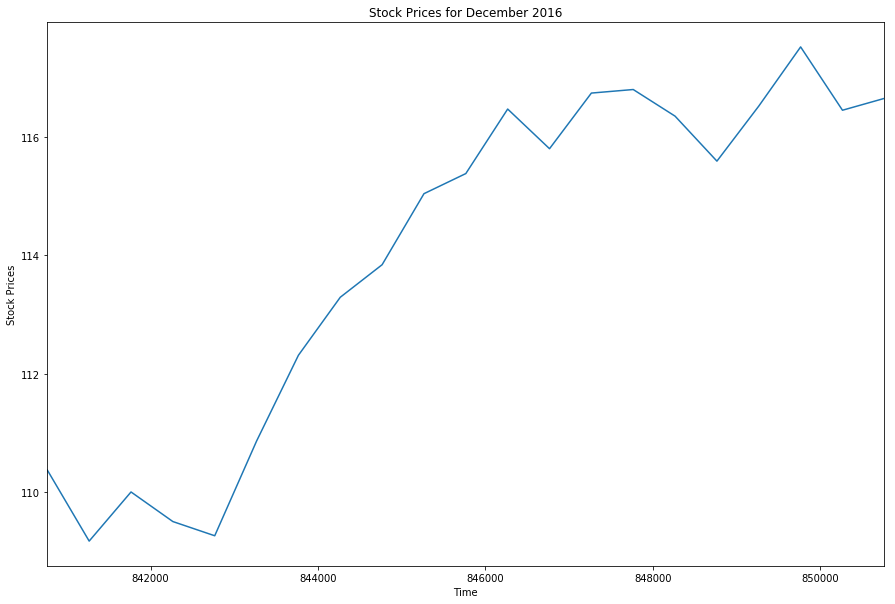

In [128]:
dataset_test['open'].plot(figsize = (15, 10))                       # Testing Set 

plt.title('Stock Prices for December 2016')      

plt.xlabel("Time")

plt.ylabel('Stock Prices')

In [129]:
real_stock_price = dataset_test.iloc[:, 2:3].values

In [130]:
###### Getting the predicted stock price of December 2016 ########

# Concatenating the training set and test set

dataset_total_AAP = pd.concat((dataset_train['open'], 
                           dataset_test['open']), axis = 0)

inputs_AAP = dataset_total_AAP[len(dataset_total_AAP) - len(dataset_test) - 60:].values   # Inputs we need to predict the stock price of December 2016

In [131]:
# Reshaping to get the right np shape

inputs_AAP = inputs_AAP.reshape(-1, 1)

inputs_AAP = sc.transform(inputs_AAP)

# Creating special dataset structure for our test set

X_test_AAP = []     # This will be the inputs we need to predict the value of the test set

# Since the test set only contains 20 financial days, our range will be from 60 to 80

for i in range(60, 80):
    X_test_AAP.append(inputs_AAP[i - 60:i, 0])
     
X_test_AAP = np.array(X_test_AAP)

X_test_AAP = np.reshape(X_test_AAP, (20, 60, 1))

In [132]:
predicted_stock_price_AAP = regressor.predict(X_test_AAP)        # Predicting the stock price

predicted_stock_price_AAP = sc.inverse_transform(predicted_stock_price_AAP)

Text(0.5, 1.0, 'Stock Price Prediction')

Text(0.5, 0, 'Time')

Text(0, 0.5, 'Stock Price')

<function matplotlib.pyplot.show(*args, **kw)>

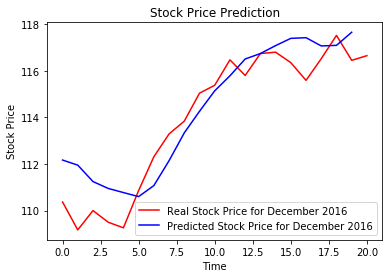

In [133]:
# Visualizing the results 

plt.plot(real_stock_price, color = 'red', label = 'Real Stock Price for December 2016')    

plt.plot(predicted_stock_price_AAP, color = 'blue', label = 'Predicted Stock Price for December 2016')

plt.title('Stock Price Prediction')

plt.xlabel('Time')

plt.ylabel('Stock Price')

plt.legend()

plt.show

# Running the RNN for United Health Care

In [97]:
# Filtering to only get prices for UPS and dropping the last 4 columns 

prices_UNH = prices[prices['symbol'] == 'UNH']
prices_UNH.head(30)
prices_UNH.tail(30)

# We are going to make a RNN model to predict the stock price for December 2016

,date,symbol,open,close,low,high,volume
672,2010-01-04,UNH,31.379999,31.530001,30.969999,31.600000,12199500
1140,2010-01-05,UNH,31.730000,31.480000,31.280001,31.969999,11180700
1608,2010-01-06,UNH,31.600000,31.790001,31.410000,32.060001,9761100
2076,2010-01-07,UNH,31.590000,33.009998,31.590000,33.049999,11789800
2544,2010-01-08,UNH,32.860001,32.700001,32.340000,32.919998,7228700
3012,2010-01-11,UNH,32.709999,32.919998,32.700001,33.130001,7206900
3480,2010-01-12,UNH,32.700001,32.049999,31.540001,32.910000,13121500
3948,2010-01-13,UNH,31.990000,32.540001,31.680000,32.549999,8797200
4416,2010-01-14,UNH,32.680000,33.320000,32.330002,33.330002,8818300
4884,2010-01-15,UNH,33.540001,33.750000,33.099998,33.990002,19382000


,date,symbol,open,close,low,high,volume
836714,2016-11-17,UNH,151.820007,150.770004,150.190002,151.919998,4683000
837214,2016-11-18,UNH,151.050003,149.449997,149.399994,151.660004,5664800
837714,2016-11-21,UNH,149.720001,150.410004,148.559998,150.660004,3867800
838214,2016-11-22,UNH,151.080002,152.259995,150.559998,152.929993,4992100
838714,2016-11-23,UNH,152.009995,153.539993,150.960007,153.740005,2697200
839214,2016-11-25,UNH,153.929993,152.809998,152.610001,154.500000,1664500
839714,2016-11-28,UNH,152.740005,152.110001,150.000000,152.850006,4988600
840214,2016-11-29,UNH,156.940002,157.589996,155.179993,158.119995,5827400
840714,2016-11-30,UNH,157.470001,158.320007,157.070007,159.759995,7142400
841214,2016-12-01,UNH,159.119995,160.940002,159.119995,161.720001,5198500


In [98]:
dataset_train = prices_UNH[prices_UNH['date'] < '2016-12-01']
training_set = dataset_train.iloc[:, 2:3].values

Text(0.5, 1.0, 'Stock Prices from January 2010 until November 2016')

Text(0.5, 0, 'Time')

Text(0, 0.5, 'Stock Prices')

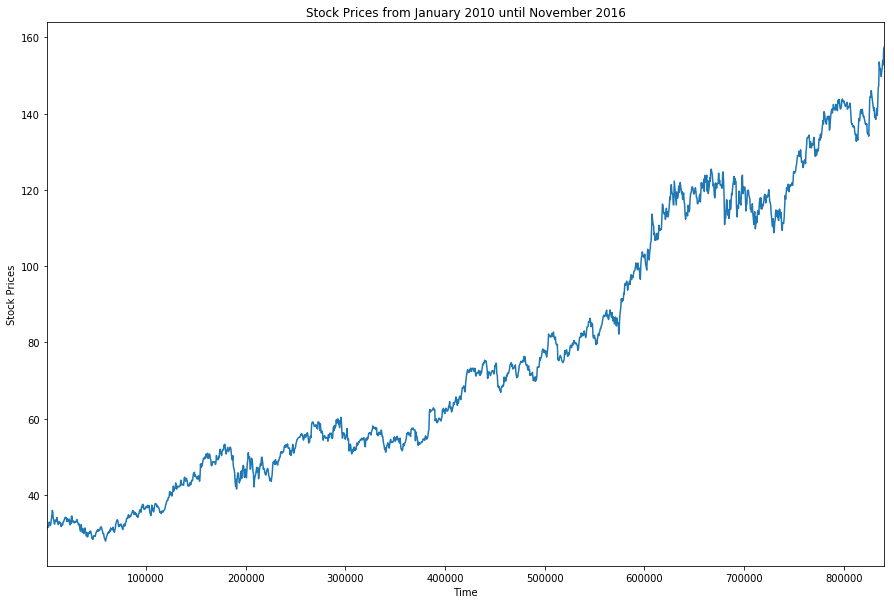

In [99]:
dataset_train['open'].plot(figsize = (15, 10))                       # Training Set 
plt.title('Stock Prices from January 2010 until November 2016')      
plt.xlabel("Time")
plt.ylabel('Stock Prices')  

# We will train our data over these years

In [100]:
# Feature Scaling

from sklearn.preprocessing import MinMaxScaler

sc = MinMaxScaler(feature_range = (0,1))

training_set_scaled = sc.fit_transform(training_set)

In [101]:
training_set_scaled.shape

(1741, 1)

In [102]:
# Creating a data structure with 60 timesteps and 1 output

X_train = []
y_train = []

for i in range(60, 1741):
    
    X_train.append(training_set_scaled[i -60:i , 0])
    y_train.append(training_set_scaled[i , 0])

X_train, y_train = np.array(X_train), np.array(y_train)

In [103]:
# Reshaping to add new dimension 

X_train = np.reshape(X_train, (1681, 60, 1))

In [104]:
# Initialising the RNN

regressor = Sequential()

In [105]:
# Adding the first LSTM layer and some dropout regularisation 

regressor.add(LSTM(units = 50, return_sequences = True, input_shape = (60 , 1)))
regressor.add(Dropout(0.2))

# Adding the second LSTM layer and some dropout regularisation 

regressor.add(LSTM(units = 50, return_sequences = True))
regressor.add(Dropout(0.2))

# Adding the third LSTM layer and some dropout regularisation 

regressor.add(LSTM(units = 50, return_sequences = True))
regressor.add(Dropout(0.2))

# Adding the fourth LSTM layer and some dropout regularisation 

regressor.add(LSTM(units = 50))


# Adding the output layer

regressor.add(Dense(units = 1))

In [106]:
# Compiling the RNN

regressor.compile(optimizer = 'adam', loss = 'mean_squared_error')

In [80]:
# Fitting the RNN

regressor.fit(X_train, y_train, epochs = 100, batch_size = 32)

# Started with a loss of 0.0236
# Ended with a loss of 0.00041

Epoch 1/100
1681/1681 [==============================] - 6s 3ms/step - loss: 0.0238
Epoch 2/100
1681/1681 [==============================] - 4s 2ms/step - loss: 0.0011
Epoch 3/100
1681/1681 [==============================] - 4s 2ms/step - loss: 0.0011
Epoch 4/100
1681/1681 [==============================] - 5s 3ms/step - loss: 0.0010
Epoch 5/100
1681/1681 [==============================] - 6s 3ms/step - loss: 0.0011
Epoch 6/100
1681/1681 [==============================] - 6s 3ms/step - loss: 9.4459e-04
Epoch 7/100
1681/1681 [==============================] - 5s 3ms/step - loss: 0.0012
Epoch 8/100
1681/1681 [==============================] - 5s 3ms/step - loss: 8.3341e-04A: 0s - loss: 8.2972e-0
Epoch 9/100
1681/1681 [==============================] - 5s 3ms/step - loss: 8.5488e-04
Epoch 10/100
1681/1681 [==============================] - 6s 3ms/step - loss: 0.0011
Epoch 11/100
1681/1681 [==============================] - 5s 3ms/step - loss: 8.0070e-04
Epoch 12/100
1681/1681 [===========

In [81]:
dataset_test = prices_UNH[prices_UNH['date'] > '2016-11-30']   # opening prices for December 2016 (The testing data)
dataset_test.head()

,date,symbol,open,close,low,high,volume
841214,2016-12-01,UNH,159.119995,160.940002,159.119995,161.720001,5198500
841714,2016-12-02,UNH,161.000000,160.729996,160.559998,162.520004,3476000
842214,2016-12-05,UNH,160.190002,157.630005,156.229996,160.669998,5818600
842714,2016-12-06,UNH,158.169998,157.320007,156.259995,158.229996,3179200
843214,2016-12-07,UNH,157.889999,159.399994,156.350006,159.979996,4494600


Text(0.5, 1.0, 'Stock Prices for December 2016')

Text(0.5, 0, 'Time')

Text(0, 0.5, 'Stock Prices')

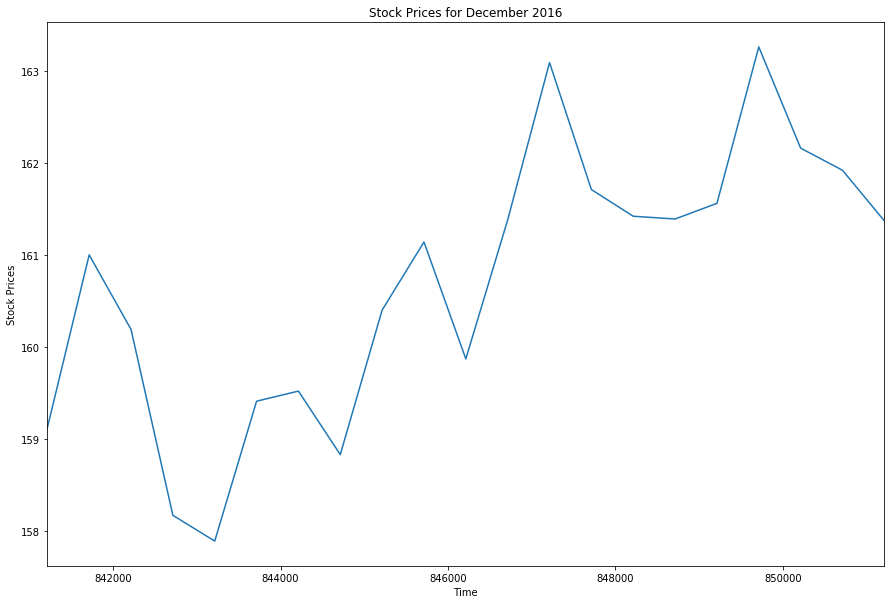

In [82]:
dataset_test['open'].plot(figsize = (15, 10))                       # Testing Set 

plt.title('Stock Prices for December 2016')      

plt.xlabel("Time")

plt.ylabel('Stock Prices')

In [83]:
real_stock_price = dataset_test.iloc[:, 2:3].values

In [84]:
###### Getting the predicted stock price of December 2016 ########

# Concatenating the training set and test set

dataset_total_UNH = pd.concat((dataset_train['open'], 
                           dataset_test['open']), axis = 0)

inputs_UNH = dataset_total_UNH[len(dataset_total_UNH) - len(dataset_test) - 60:].values   # Inputs we need to predict the stock price of December 2016

In [85]:
# Reshaping to get the right np shape

inputs_UNH = inputs_UNH.reshape(-1, 1)

inputs_UNH = sc.transform(inputs_UNH)

# Creating special dataset structure for our test set

X_test_UNH = []     # This will be the inputs we need to predict the value of the test set

# Since the test set only contains 20 financial days, our range will be from 60 to 80

for i in range(60, 80):
    X_test_UNH.append(inputs_UNH[i - 60:i, 0])
     
X_test_UNH = np.array(X_test_UNH)

X_test_UNH = np.reshape(X_test_UNH, (20, 60, 1))

In [86]:
predicted_stock_price_UNH = regressor.predict(X_test_UNH)        # Predicting the stock price

predicted_stock_price_UNH = sc.inverse_transform(predicted_stock_price_UNH)

Text(0.5, 1.0, 'Stock Price Prediction')

Text(0.5, 0, 'Time')

Text(0, 0.5, 'Stock Price')

<function matplotlib.pyplot.show(*args, **kw)>

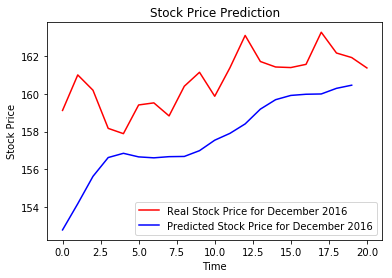

In [87]:
# Visualizing the results 

plt.plot(real_stock_price, color = 'red', label = 'Real Stock Price for December 2016')    

plt.plot(predicted_stock_price_UNH, color = 'blue', label = 'Predicted Stock Price for December 2016')

plt.title('Stock Price Prediction')

plt.xlabel('Time')

plt.ylabel('Stock Price')

plt.legend()

plt.show

### Arima Forecasting

ARIMA stands for Auto Regressive Integrated Moving Average. ARIMA models are a popular and flexible class of forecasting model that utilize historical information to make predictions.
This method has three variables to account for:

P = Periods to lag . P helps adjust the line that is being fitted to forecast the series. Purely autoregressive models resemble a linear regression where the predictive variables are P number of previous periods

D = In an ARIMA model we transform a time series into stationary one(series without trend or seasonality) using differencing. Differencing is a method of transforming a non-stationary time series into a stationary one. This is an important step in preparing data to be used in an ARIMA model.The first differencing value is the difference between the current time period and the previous time period. If these values fail to revolve around a constant mean and variance then we find the second differencing using the values of the first differencing. We repeat this until we get a stationary series

Q = This variable denotes the lag of the error component, where error component is a part of the time series not explained by trend or seasonality.

Here we have forecasted the upcoming closing stock prices for the top companies from 4 key sectors:

IT : **Apple**

Healthcare: **UNH**

Telecom: **AT&T**

Industrial: **UPS**



In [26]:
from pandas import read_excel
from pandas import datetime
from pandas import DataFrame
import matplotlib.pyplot as plt
from pandas.plotting import autocorrelation_plot
from statsmodels.tsa.arima_model import ARIMA
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.graphics.tsaplots import plot_pacf
from statsmodels.tsa.stattools import adfuller
from sklearn.metrics import mean_squared_error
from math import sqrt

### Differencing function

In [27]:
def diffr(dataset):
    diff=list()
    for i in range(1, len(dataset)):
        value = dataset[i]-dataset[i-1]
        diff.append(value)
    return diff

We have plotted the data series for Apple (AAPL) below. It can be seen that data is not stationary.

# 1. Apple

### data plot & autocorrelation plot: Non-stationarity is slightly present.

date
2010-01-04    30.572857
2010-01-05    30.625713
2010-01-06    30.138571
2010-01-07    30.082857
2010-01-08    30.282858
Name: close, dtype: float64


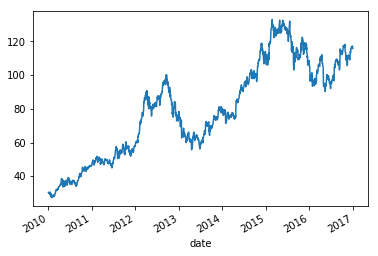

In [28]:
data = read_excel('arima_Apple.xlsx', header=0, parse_dates=[0], index_col=0, squeeze=True)
print(data.head())
data.plot()
pyplot.show()

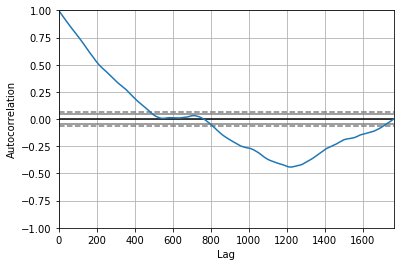

In [29]:
autocorrelation_plot(data)
pyplot.show()

### Augmented Dickey Fuller Test- Stationarity check: p-value is >0.05, hence data is non-stationary

In [31]:
X=data.values
result = adfuller(X)
print('ADF Statistic for X: %f' % result[0])
print('p value for X: %f' % result[1])

ADF Statistic for X: -1.324458
p value for X: 0.617910


### Checking ADF test again, after 1 differencing. p-value<0.05 -> data is now stationary -> hence confirmed d=1
 

In [32]:
Y=diffr(X)
result1 = adfuller(Y)
print('ADF Statistic for Y: %f' % result1[0])
print('p value for Y: %f' % result1[1])

ADF Statistic for Y: -41.122158
p value for Y: 0.000000


### Checking acf & pacf plots to determine q (for MA) & p (for AR) resp.

#### ACF & PACF plots to determine p & q

Autocorrelation function plot (ACF):Autocorrelation refers to how correlated a time series is with its past values whereas the ACF is the plot used to see the correlation between the points, up to and including the lag unit
After plotting the ACF plot we move to Partial Autocorrelation Function plots (PACF). A partial autocorrelation is a summary of the relationship between an observation in a time series with observations at prior time steps with the relationships of intervening observations removed.
The partial autocorrelation at lag k is the correlation that results after removing the effect of any correlations due to the terms at shorter lags.

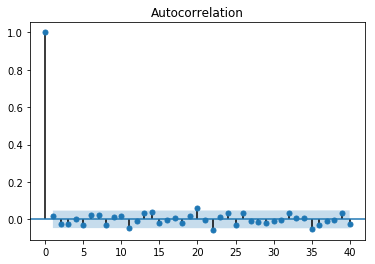

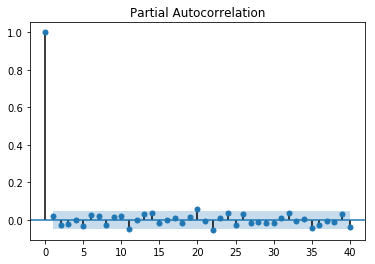

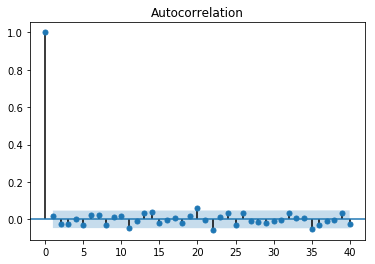

In [33]:
plot_pacf(Y, lags=40)
plot_acf(Y, lags=40)

We can also calculate a final root mean squared error score (RMSE) for the predictions, providing a point of comparison for other ARIMA configurations. We performed this for Apple and We got a MSE of 1.725

### Creating train and test sets, creating prediction for every observation in the test set

C:\Users\Roshiny Thomas\Anaconda3\lib\site-packages\scipy\signal\signaltools.py:1341: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  out_full[ind] += zi
C:\Users\Roshiny Thomas\Anaconda3\lib\site-packages\scipy\signal\signaltools.py:1344: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  out = out_full[ind]
C:\Users\Roshiny Thomas\Anaconda3\lib\site-packages\scipy\signal\signaltools.py:1350: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this wil

predicted=115.587004, expected=119.720001
predicted=119.869715, expected=113.489998
predicted=113.495559, expected=115.239998
predicted=115.305739, expected=115.150002
predicted=115.209410, expected=115.959999
predicted=116.022843, expected=117.160004
predicted=117.225356, expected=116.500000
predicted=116.558396, expected=115.010002
predicted=115.063825, expected=112.650002
predicted=112.694696, expected=105.760002
predicted=105.721545, expected=103.120003
predicted=103.113820, expected=103.739998
predicted=103.803201, expected=109.690002
predicted=109.875587, expected=112.919998
predicted=113.072929, expected=113.290001
predicted=113.357566, expected=112.760002
predicted=112.799983, expected=107.720001
predicted=107.613741, expected=112.339996
predicted=112.493307, expected=110.370003
predicted=110.391754, expected=109.269997
predicted=109.304498, expected=112.309998
predicted=112.415970, expected=110.150002
predicted=110.175825, expected=112.570000
predicted=112.653757, expected=114

predicted=100.461377, expected=100.349998
predicted=100.392207, expected=99.860001
predicted=99.897281, expected=98.459999
predicted=98.486278, expected=97.720001
predicted=97.752740, expected=97.919998
predicted=97.963487, expected=98.629997
predicted=98.679680, expected=99.029999
predicted=99.076417, expected=98.940002
predicted=98.980749, expected=99.650002
predicted=99.700253, expected=98.830002
predicted=98.862509, expected=97.339996
predicted=97.363399, expected=97.459999
predicted=97.502147, expected=97.139999
predicted=97.176842, expected=97.550003
predicted=97.595489, expected=95.330002
predicted=95.344489, expected=95.099998
predicted=95.136605, expected=95.910004
predicted=95.958893, expected=95.550003
predicted=95.585423, expected=96.099998
predicted=96.145914, expected=93.400002
predicted=93.409284, expected=92.040001
predicted=92.060969, expected=93.589996
predicted=93.645590, expected=94.400002
predicted=94.448048, expected=95.599998
predicted=95.653629, expected=95.8899

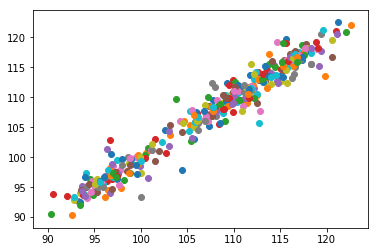

In [34]:
size= int(len(X)*0.8)
train, test = X[0:size], X[size:len(X)]
history =[i for i in train]
prediction = list()
for j in range(0, len(test)):
    model = ARIMA(history, order=(1,1,0))
    model_fit =  model.fit(disp=0)
    output = model_fit.forecast()
    yhat = output[0]
    prediction.append(yhat)
    obs = test[j]
    history.append(obs)
    print('predicted=%f, expected=%f' % (yhat, obs))
    plt.scatter(yhat, obs)
rmse = sqrt(mean_squared_error(test, prediction))
print('Test MSE: %.3f' % rmse)

We will repeat the entire procedure shown above for UNH, AT&T and UPS as well.

# 2. UNH


date
2010-01-04    31.530001
2010-01-05    31.480000
2010-01-06    31.790001
2010-01-07    33.009998
2010-01-08    32.700001
Name: close, dtype: float64


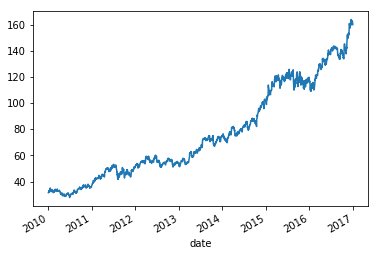

In [35]:
data = read_excel('arima_UNH.xlsx', header=0, parse_dates=[0], index_col=0, squeeze=True)
print(data.head())
data.plot()
pyplot.show()

In [36]:
X=data.values
result = adfuller(X)
print('ADF Statistic for X: %f' % result[0])
print('p value for X: %f' % result[1])
Y=diffr(X)
result1 = adfuller(Y)
print('ADF Statistic for Y: %f' % result1[0])
print('p value for Y: %f' % result1[1])

ADF Statistic for X: 1.876387
p value for X: 0.998489
ADF Statistic for Y: -10.573729
p value for Y: 0.000000


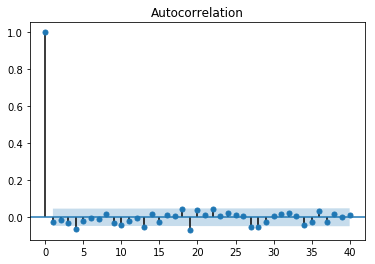

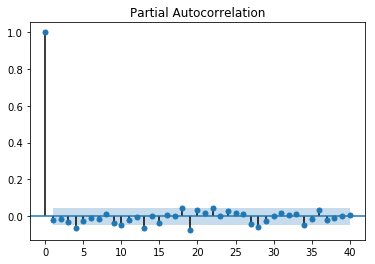

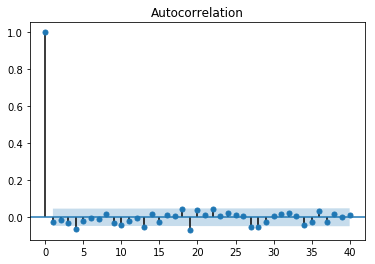

In [37]:
plot_pacf(Y, lags=40)
plot_acf(Y, lags=40)

#### RMSE: 1.752

C:\Users\Roshiny Thomas\Anaconda3\lib\site-packages\scipy\signal\signaltools.py:1341: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  out_full[ind] += zi
C:\Users\Roshiny Thomas\Anaconda3\lib\site-packages\scipy\signal\signaltools.py:1344: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  out = out_full[ind]
C:\Users\Roshiny Thomas\Anaconda3\lib\site-packages\scipy\signal\signaltools.py:1350: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this wil

predicted=121.899909, expected=122.480003
predicted=122.511412, expected=122.260002
predicted=122.340216, expected=121.199997
predicted=121.325935, expected=120.519997
predicted=120.623738, expected=121.019997
predicted=121.059305, expected=123.820000
predicted=123.737437, expected=125.500000
predicted=125.485415, expected=123.220001
predicted=123.409310, expected=119.790001
predicted=120.014212, expected=116.279999
predicted=116.468589, expected=110.430000
predicted=110.599376, expected=109.980003
predicted=110.043580, expected=113.459999
predicted=113.456748, expected=117.769997
predicted=117.802235, expected=117.279999
predicted=117.344845, expected=115.699997
predicted=115.771664, expected=112.629997
predicted=112.698934, expected=114.230003
predicted=114.276637, expected=113.989998
predicted=114.050075, expected=112.360001
predicted=112.428955, expected=116.089996
predicted=116.105680, expected=115.080002
predicted=115.154007, expected=116.769997
predicted=116.803752, expected=118

predicted=130.549152, expected=130.000000
predicted=130.076005, expected=130.940002
predicted=130.979160, expected=130.419998
predicted=130.496747, expected=132.589996
predicted=132.596398, expected=133.419998
predicted=133.463477, expected=132.979996
predicted=133.056129, expected=134.000000
predicted=134.038429, expected=133.669998
predicted=133.743790, expected=134.529999
predicted=134.572624, expected=136.039993
predicted=136.067078, expected=136.839996
predicted=136.886478, expected=138.149994
predicted=138.184866, expected=136.940002
predicted=137.038100, expected=140.399994
predicted=140.372211, expected=140.679993
predicted=140.741570, expected=139.240005
predicted=139.348148, expected=138.089996
predicted=138.188167, expected=137.869995
predicted=137.943119, expected=137.259995
predicted=137.342951, expected=138.660004
predicted=138.690175, expected=137.690002
predicted=137.783823, expected=138.520004
predicted=138.564478, expected=138.190002
predicted=138.266657, expected=137

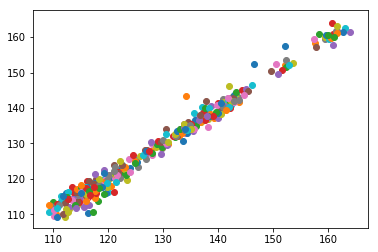

In [38]:
size= int(len(X)*0.8)
train, test = X[0:size], X[size:len(X)]
history =[i for i in train]
prediction = list()
for j in range(0, len(test)):
    model = ARIMA(history, order=(1,1,0))
    model_fit =  model.fit(disp=0)
    output = model_fit.forecast()
    yhat = output[0]
    prediction.append(yhat)
    obs = test[j]
    history.append(obs)
    print('predicted=%f, expected=%f' % (yhat, obs))
    plt.scatter(yhat, obs)
rmse = sqrt(mean_squared_error(test, prediction))
print('Test MSE: %.3f' % rmse)

### 3. AT & T

date
2010-01-04    28.580000
2010-01-05    28.440001
2010-01-06    27.610001
2010-01-07    27.299999
2010-01-08    27.100000
Name: close, dtype: float64


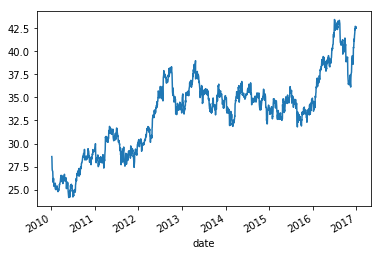

In [39]:
data = read_excel('arima_T.xlsx', header=0, parse_dates=[0], index_col=0, squeeze=True)
print(data.head())
data.plot()
pyplot.show()

In [40]:
X=data.values
result = adfuller(X)
print('ADF Statistic for X: %f' % result[0])
print('p value for X: %f' % result[1])
Y=diffr(X)
result1 = adfuller(Y)
print('ADF Statistic for Y: %f' % result1[0])
print('p value for Y: %f' % result1[1])

ADF Statistic for X: -1.076761
p value for X: 0.724250
ADF Statistic for Y: -42.061100
p value for Y: 0.000000


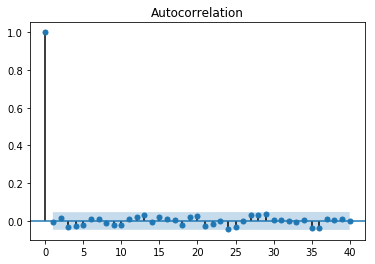

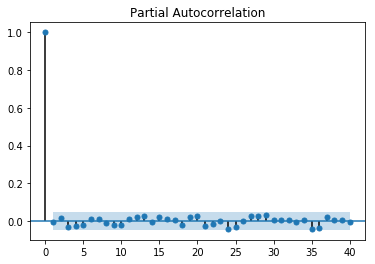

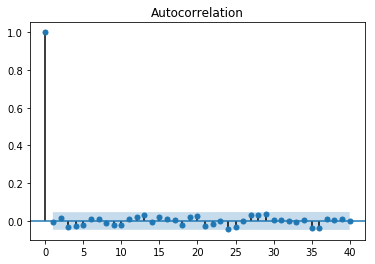

In [41]:
plot_pacf(Y, lags=40)
plot_acf(Y, lags=40)

#### RMSE: 0.362

C:\Users\Roshiny Thomas\Anaconda3\lib\site-packages\scipy\signal\signaltools.py:1341: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  out_full[ind] += zi
C:\Users\Roshiny Thomas\Anaconda3\lib\site-packages\scipy\signal\signaltools.py:1344: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  out = out_full[ind]
C:\Users\Roshiny Thomas\Anaconda3\lib\site-packages\scipy\signal\signaltools.py:1350: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this wil

predicted=34.214114, expected=34.779999
predicted=34.782395, expected=34.650002
predicted=34.654855, expected=34.020000
predicted=34.026055, expected=33.810001
predicted=33.814238, expected=34.049999
predicted=34.053197, expected=34.230000
predicted=34.233546, expected=34.349998
predicted=34.353796, expected=34.360001
predicted=34.364069, expected=33.950001
predicted=33.954794, expected=33.380001
predicted=33.383808, expected=32.369999
predicted=32.369248, expected=31.799999
predicted=31.798014, expected=32.689999
predicted=32.696307, expected=33.439999
predicted=33.449724, expected=33.290001
predicted=33.292142, expected=33.200001
predicted=33.202525, expected=32.320000
predicted=32.315306, expected=32.820000
predicted=32.825565, expected=33.040001
predicted=33.044416, expected=32.560001
predicted=32.560265, expected=33.139999
predicted=33.145093, expected=32.779999
predicted=32.782263, expected=32.750000
predicted=32.752850, expected=32.720001
predicted=32.722828, expected=32.549999


predicted=38.844973, expected=39.209999
predicted=39.211809, expected=39.340000
predicted=39.345075, expected=39.790001
predicted=39.791391, expected=39.860001
predicted=39.866197, expected=40.090000
predicted=40.094383, expected=40.330002
predicted=40.334482, expected=40.189999
predicted=40.198946, expected=40.380001
predicted=40.385032, expected=40.290001
predicted=40.298422, expected=40.490002
predicted=40.494927, expected=40.730000
predicted=40.734634, expected=40.779999
predicted=40.786986, expected=41.070000
predicted=41.074264, expected=41.299999
predicted=41.305213, expected=41.880001
predicted=41.881921, expected=41.520000
predicted=41.532423, expected=42.029999
predicted=42.031574, expected=42.020000
predicted=42.028480, expected=42.540001
predicted=42.541702, expected=43.209999
predicted=43.211473, expected=43.470001
predicted=43.476529, expected=43.349998
predicted=43.360378, expected=43.099998
predicted=43.111527, expected=42.299999
predicted=42.315650, expected=42.610001


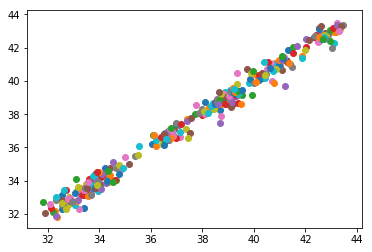

In [42]:
size= int(len(X)*0.8)
train, test = X[0:size], X[size:len(X)]
history =[i for i in train]
prediction = list()
for j in range(0, len(test)):
    model = ARIMA(history, order=(1,1,0))
    model_fit =  model.fit(disp=0)
    output = model_fit.forecast()
    yhat = output[0]
    prediction.append(yhat)
    obs = test[j]
    history.append(obs)
    print('predicted=%f, expected=%f' % (yhat, obs))
    plt.scatter(yhat, obs)
rmse = sqrt(mean_squared_error(test, prediction))
print('Test MSE: %.3f' % rmse)

### 4. UPS

date
2010-01-04    58.180000
2010-01-05    58.279999
2010-01-06    57.849998
2010-01-07    57.410000
2010-01-08    60.169998
Name: close, dtype: float64


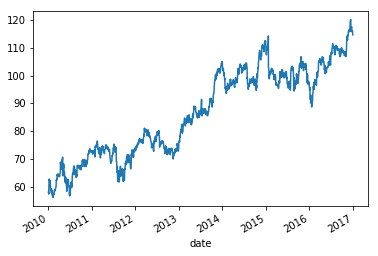

In [43]:
data = read_excel('arima_UPS.xlsx', header=0, parse_dates=[0], index_col=0, squeeze=True)
print(data.head())
data.plot()
pyplot.show()

In [44]:
X=data.values
result = adfuller(X)
print('ADF Statistic for X: %f' % result[0])
print('p value for X: %f' % result[1])
Y=diffr(X)
result1 = adfuller(Y)
print('ADF Statistic for Y: %f' % result1[0])
print('p value for Y: %f' % result1[1])

ADF Statistic for X: -1.237973
p value for X: 0.657051
ADF Statistic for Y: -42.291943
p value for Y: 0.000000


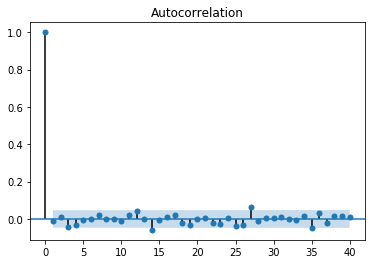

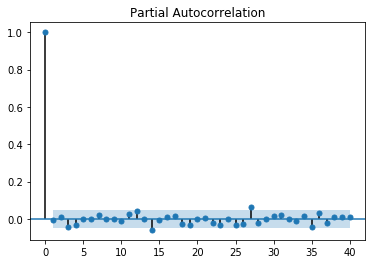

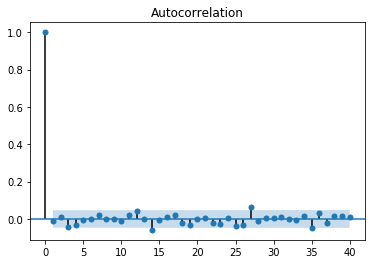

In [45]:
plot_pacf(Y, lags=40)
plot_acf(Y, lags=40)

#### RMSE: 0.972

C:\Users\Roshiny Thomas\Anaconda3\lib\site-packages\scipy\signal\signaltools.py:1341: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  out_full[ind] += zi
C:\Users\Roshiny Thomas\Anaconda3\lib\site-packages\scipy\signal\signaltools.py:1344: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  out = out_full[ind]
C:\Users\Roshiny Thomas\Anaconda3\lib\site-packages\scipy\signal\signaltools.py:1350: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this wil

predicted=102.175848, expected=103.430000
predicted=103.443555, expected=102.989998
predicted=103.028971, expected=102.820000
predicted=102.854694, expected=101.839996
predicted=101.886065, expected=102.730003
predicted=102.748034, expected=102.900002
predicted=102.929468, expected=102.760002
predicted=102.794187, expected=102.309998
predicted=102.348648, expected=101.050003
predicted=101.099635, expected=99.139999
predicted=99.193786, expected=95.510002
predicted=95.560870, expected=94.459999
predicted=94.489102, expected=96.629997
predicted=96.645794, expected=99.150002
predicted=99.177004, expected=98.639999
predicted=98.669428, expected=97.650002
predicted=97.679133, expected=95.199997
predicted=95.224175, expected=96.709999
predicted=96.733545, expected=96.769997
predicted=96.796964, expected=95.300003
predicted=95.329495, expected=97.930000
predicted=97.943318, expected=97.050003
predicted=97.083982, expected=96.820000
predicted=96.848877, expected=97.180000
predicted=97.204783, 

predicted=102.476129, expected=102.980003
predicted=103.002239, expected=103.089996
predicted=103.116946, expected=102.889999
predicted=102.920240, expected=103.050003
predicted=103.076336, expected=103.120003
predicted=103.147361, expected=103.110001
predicted=103.138223, expected=103.870003
predicted=103.890124, expected=104.690002
predicted=104.710283, expected=104.970001
predicted=104.996252, expected=104.519997
predicted=104.553691, expected=103.639999
predicted=103.677415, expected=103.730003
predicted=103.757444, expected=103.889999
predicted=103.916798, expected=104.209999
predicted=104.235332, expected=105.019997
predicted=105.040886, expected=106.099998
predicted=106.119420, expected=106.669998
predicted=106.694857, expected=105.949997
predicted=105.986413, expected=107.220001
predicted=107.237581, expected=104.410004
predicted=104.474144, expected=103.769997
predicted=103.805420, expected=104.690002
predicted=104.708154, expected=106.339996
predicted=106.352354, expected=107

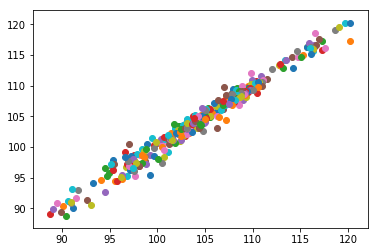

In [46]:
size= int(len(X)*0.8)
train, test = X[0:size], X[size:len(X)]
history =[i for i in train]
prediction = list()
for j in range(0, len(test)):
    model = ARIMA(history, order=(1,1,0))
    model_fit =  model.fit(disp=0)
    output = model_fit.forecast()
    yhat = output[0]
    prediction.append(yhat)
    obs = test[j]
    history.append(obs)
    print('predicted=%f, expected=%f' % (yhat, obs))
    plt.scatter(yhat, obs)
rmse = sqrt(mean_squared_error(test, prediction))
print('Test MSE: %.3f' % rmse)

# Conclusion:

We have correctly predicted the trend of the stock prices, for the month of December 2016, in our Recurrent Neural Network model by analyzing the past 6 years of opening stock prices performance. 
In order to further improve the model and its predictions, there is scope of adding the opening stock prices of those companies which might be strongly correlated with the opening stock prices of the companies in question.

In general, the problem of stock market prediction is very challenging, and very high accuracies is not achievable. Nevertheless, machine learning techniques can provide reasonable market movement predictions, that can be used by investors.
In the end after using RNN Models for Prediction and using Arima Model for Forecasting ,for this Dataset We could We should emphasize that the current dataset is very valuable, and many extensions to the current algorithm can be applied to it. First of all, we could expand the feature space to higher dimensions, and try other feature selection. 

References : https://towardsdatascience.com/time-series-forecasting-arima-models-7f221e9eee06
